In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.animation as ani
from matplotlib.pyplot import figure
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [39]:
df = pd.read_parquet('countywise_daily_cases.parquet.gzip')
df.rename(columns={'county':'COUNTY'},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.reset_index()
df.drop(['index'], inplace=True, axis=1)
df.head()

COUNTY       date  daily_cases
0  Albany 2020-01-22          0.0
1  Albany 2020-01-23          0.0
2  Albany 2020-01-24          0.0
3  Albany 2020-01-25          0.0
4  Albany 2020-01-26          0.0

In [40]:
#!pip3 install contextily
import contextily as cx

In [41]:
street_map = gpd.read_file('NYS_Civil_Boundaries.shp.zip',)
# geo_df = gpd.GeoDataFrame(df_NY_city, crs=crs, geometry=df_NY_city.geocoded_hospital_address)

In [42]:
import matplotlib.colors as colors
import mapclassify
# import geoplot
%matplotlib inline


def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False, cmap='Reds'):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    cmap = cmap
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    vmin, vmax, vcenter = subset[col_name].min(
    ), subset[col_name].max(), subset[col_name].mean()
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Lattitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)
# plt.show()


**Population Density in New York State**

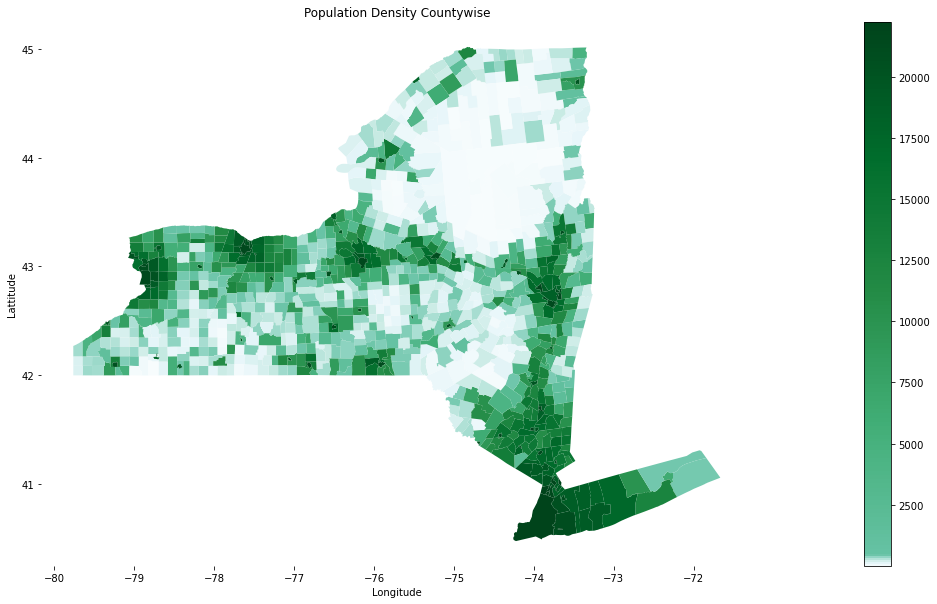

In [43]:
fig, ax = plt.subplots(figsize=(40, 10))
plot_geo_data(street_map, 'pop_density', ax=ax, fig=fig, show_base_cbar=True,cmap='BuGn',title='Population Density Countywise')


**Let us visualize the dynamics of pandemic over past years (cases) accross all the county of NY state**

Pandemic rolled accross the U.S. unevenly and in multiple waves 

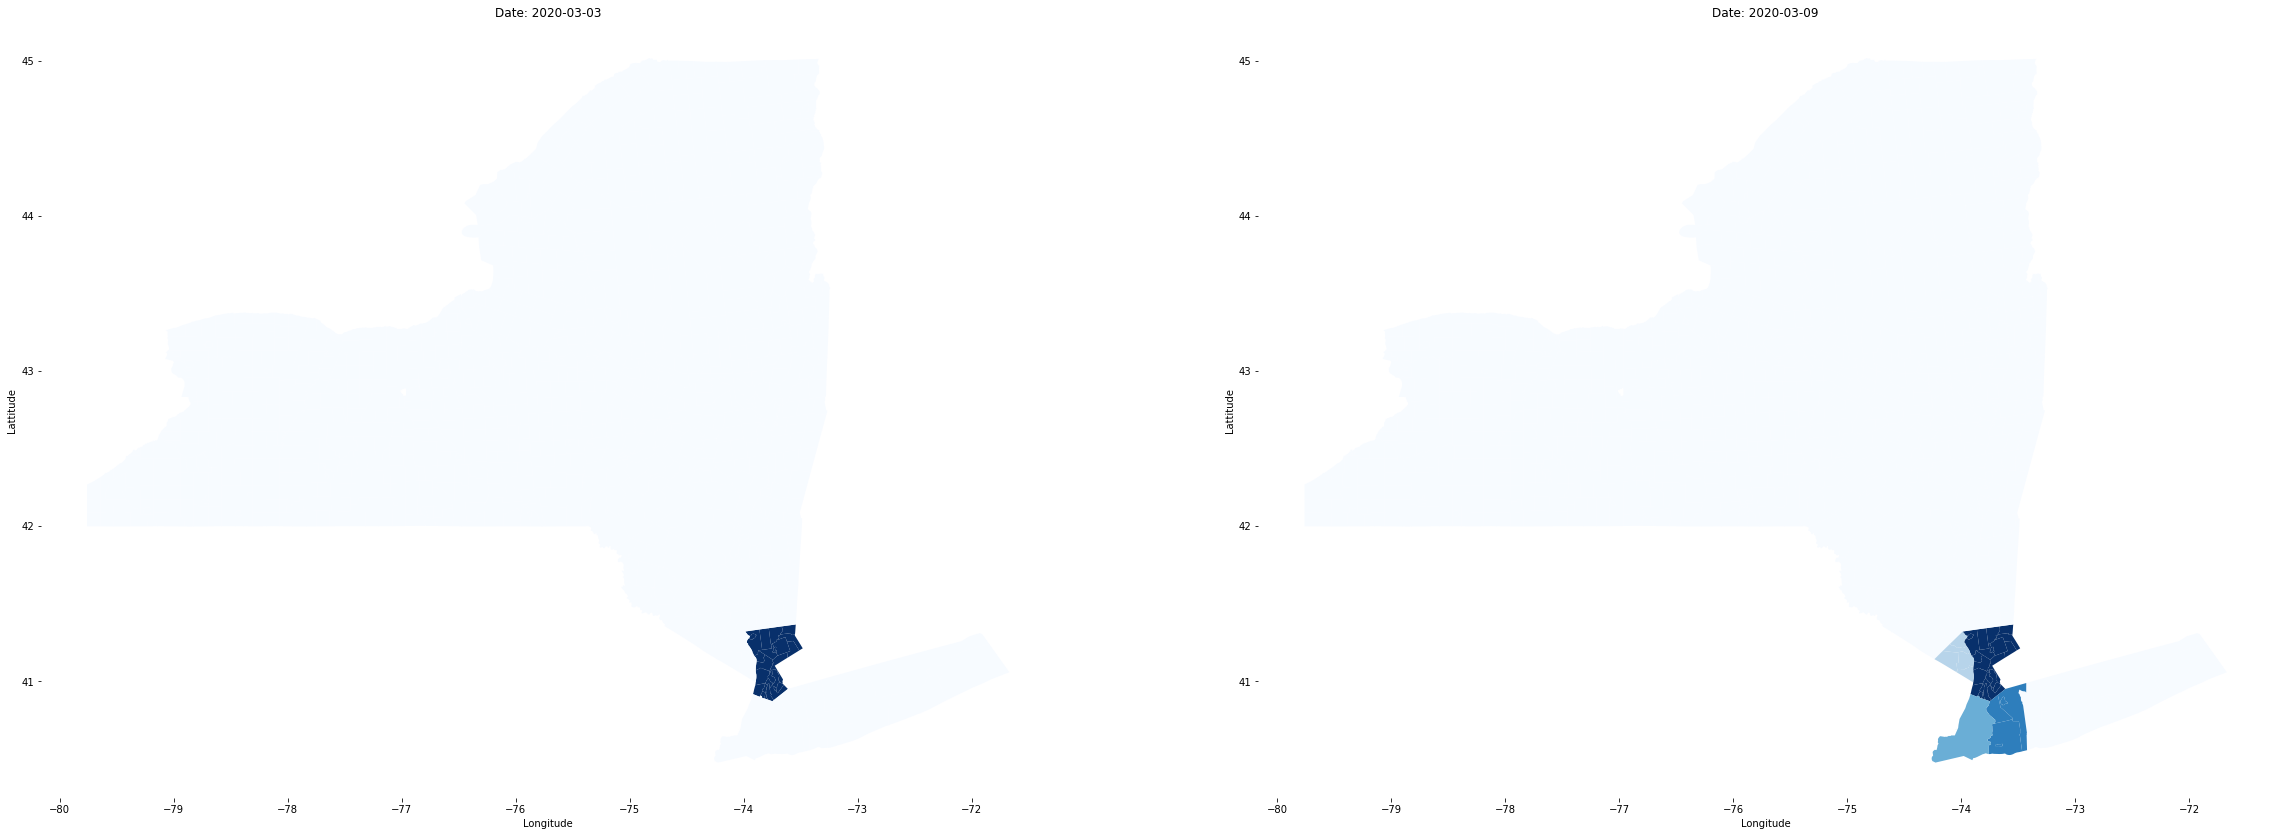

In [44]:
#2020-03-13
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-03',ax1),('2020-03-09',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

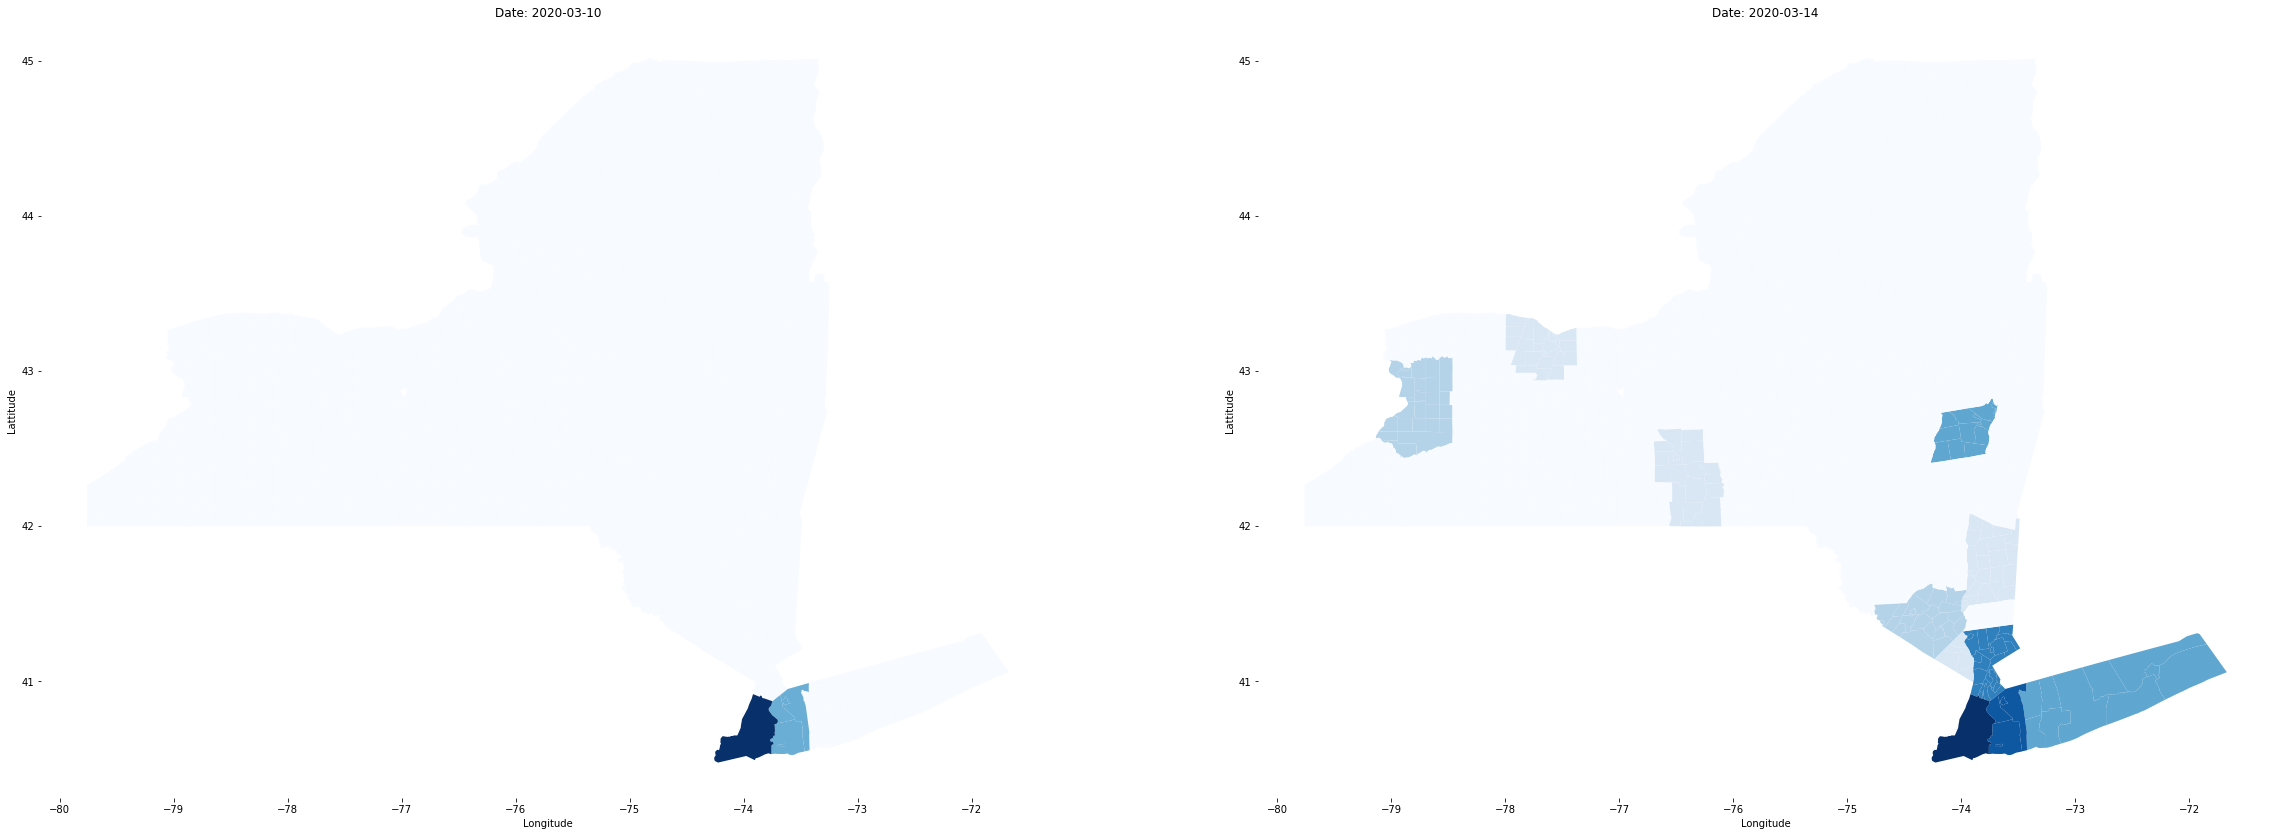

In [45]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-10',ax1),('2020-03-14',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

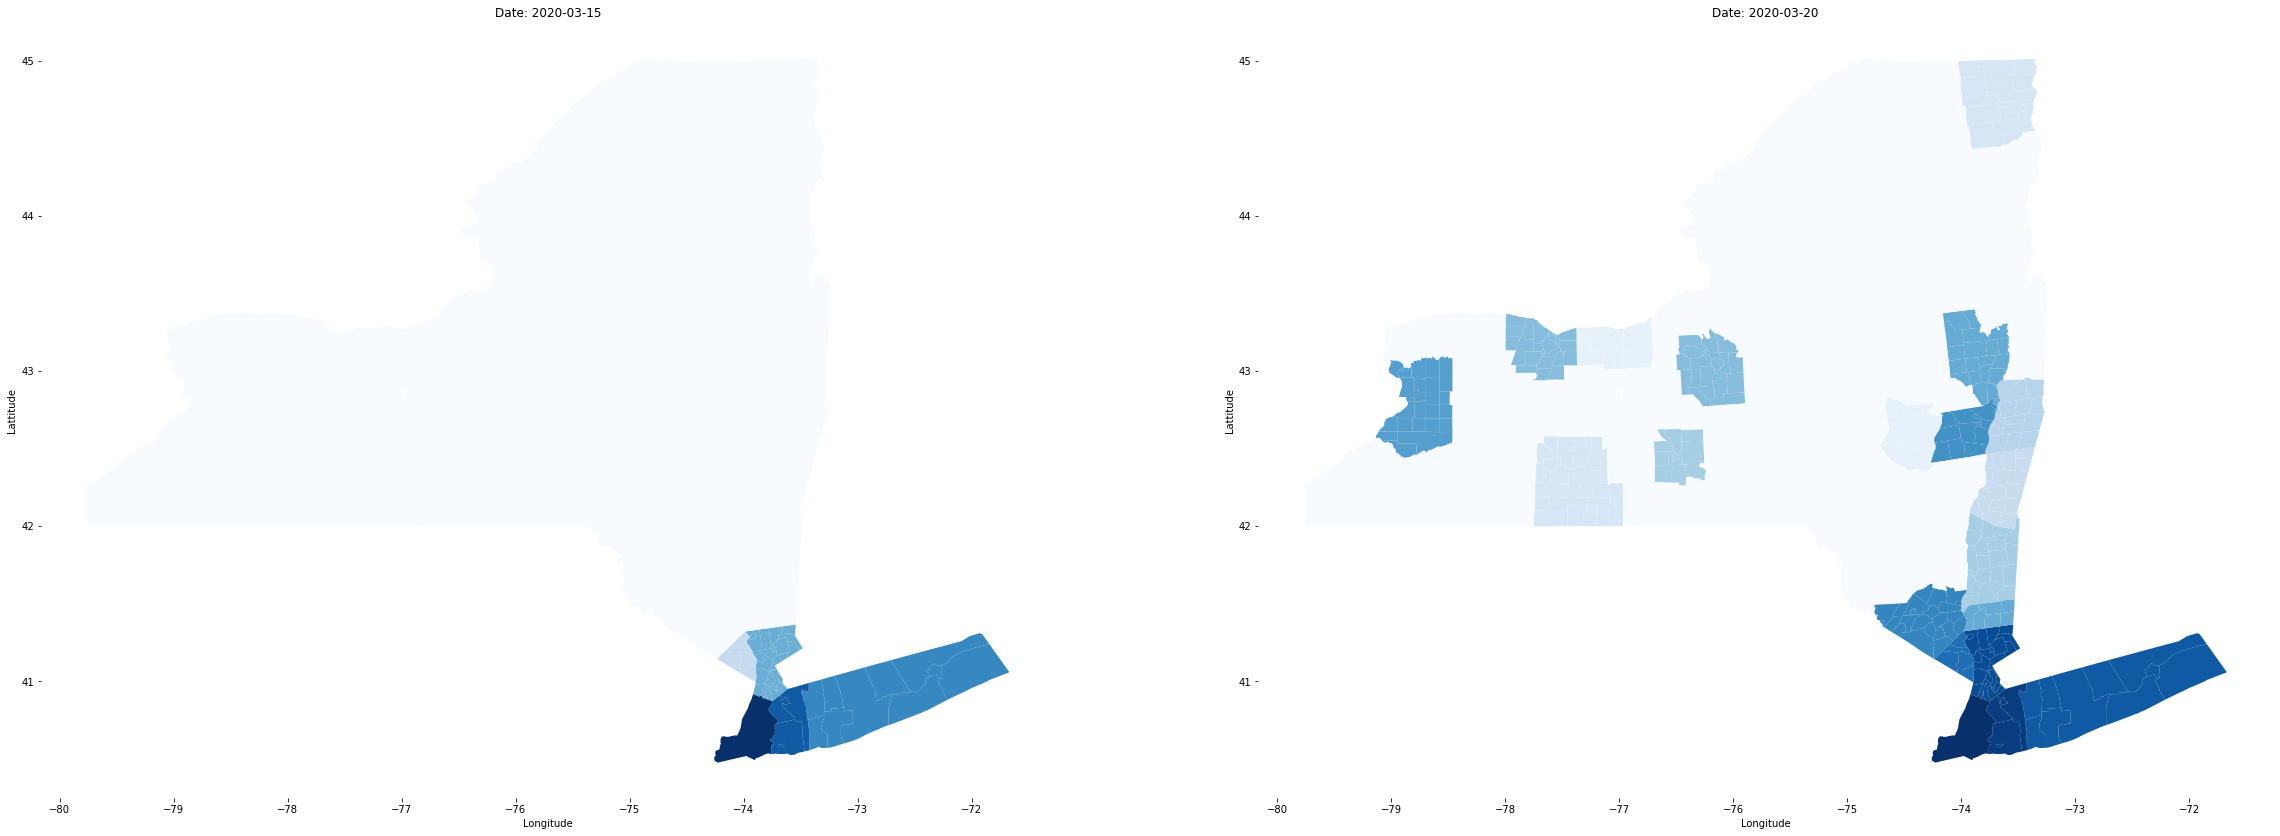

In [46]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-15',ax1),('2020-03-20',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

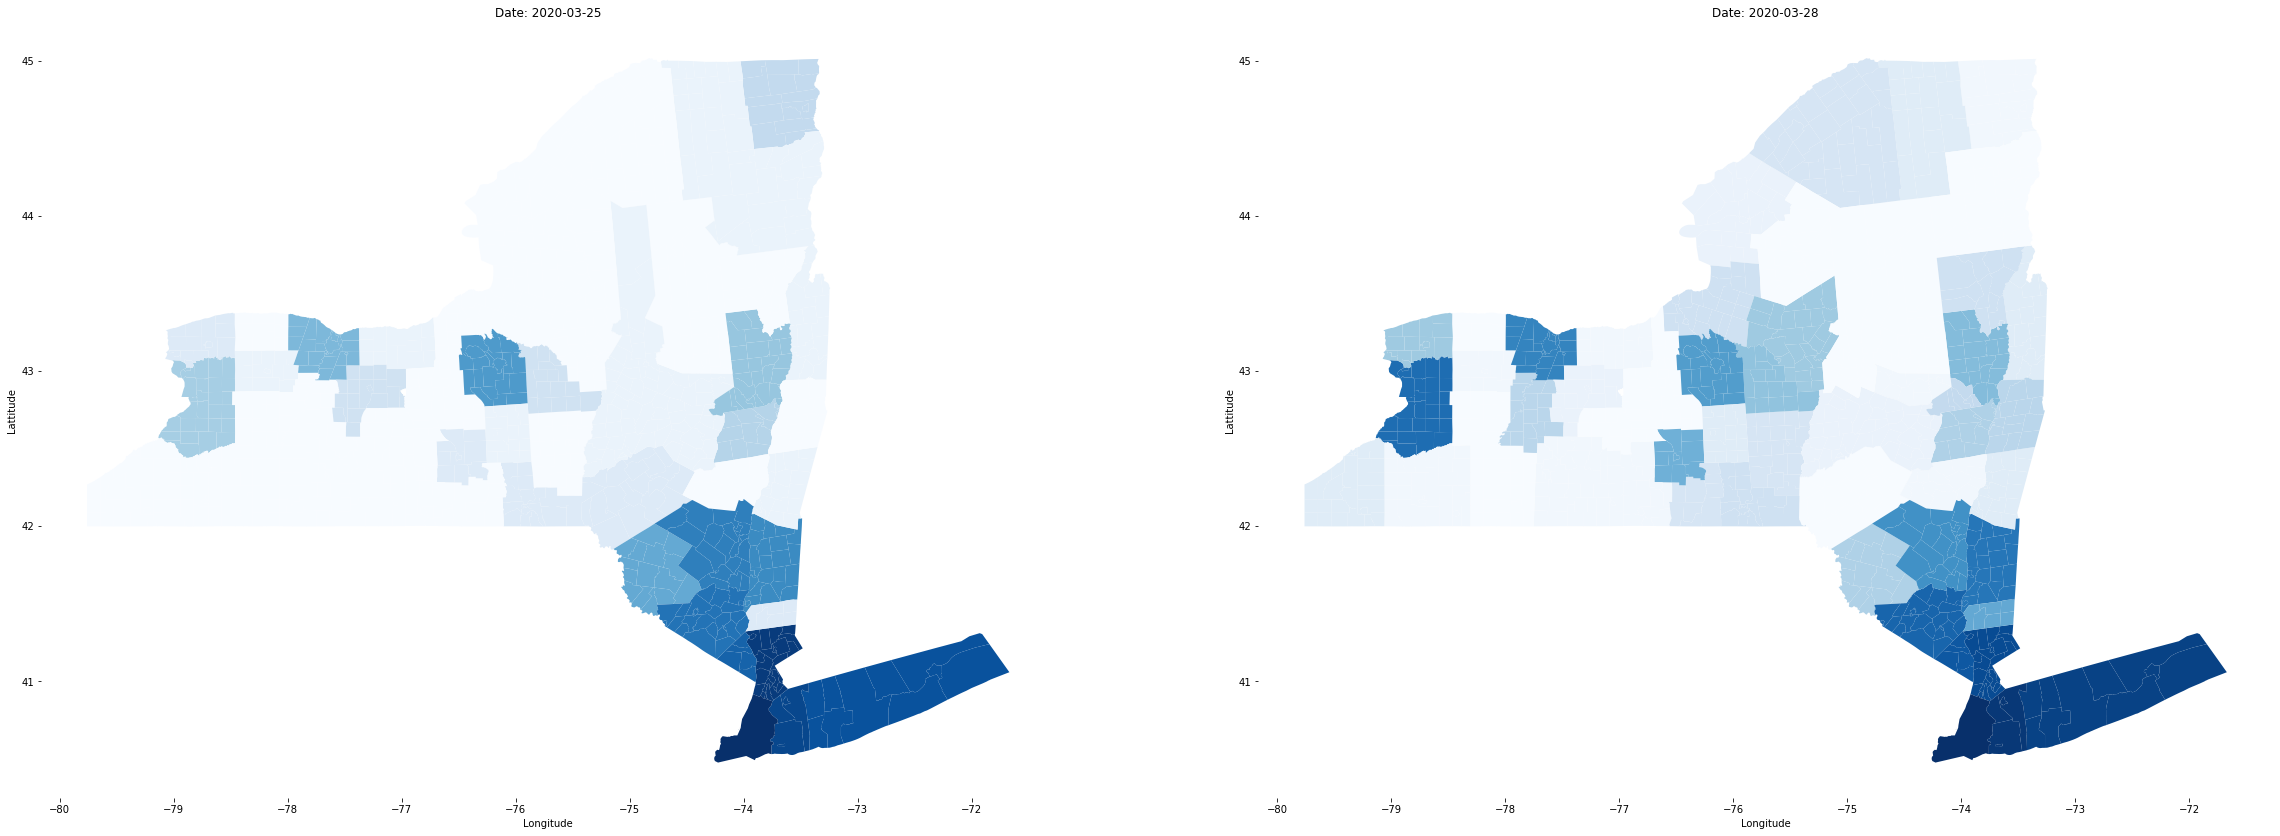

In [47]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-25',ax1),('2020-03-28',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

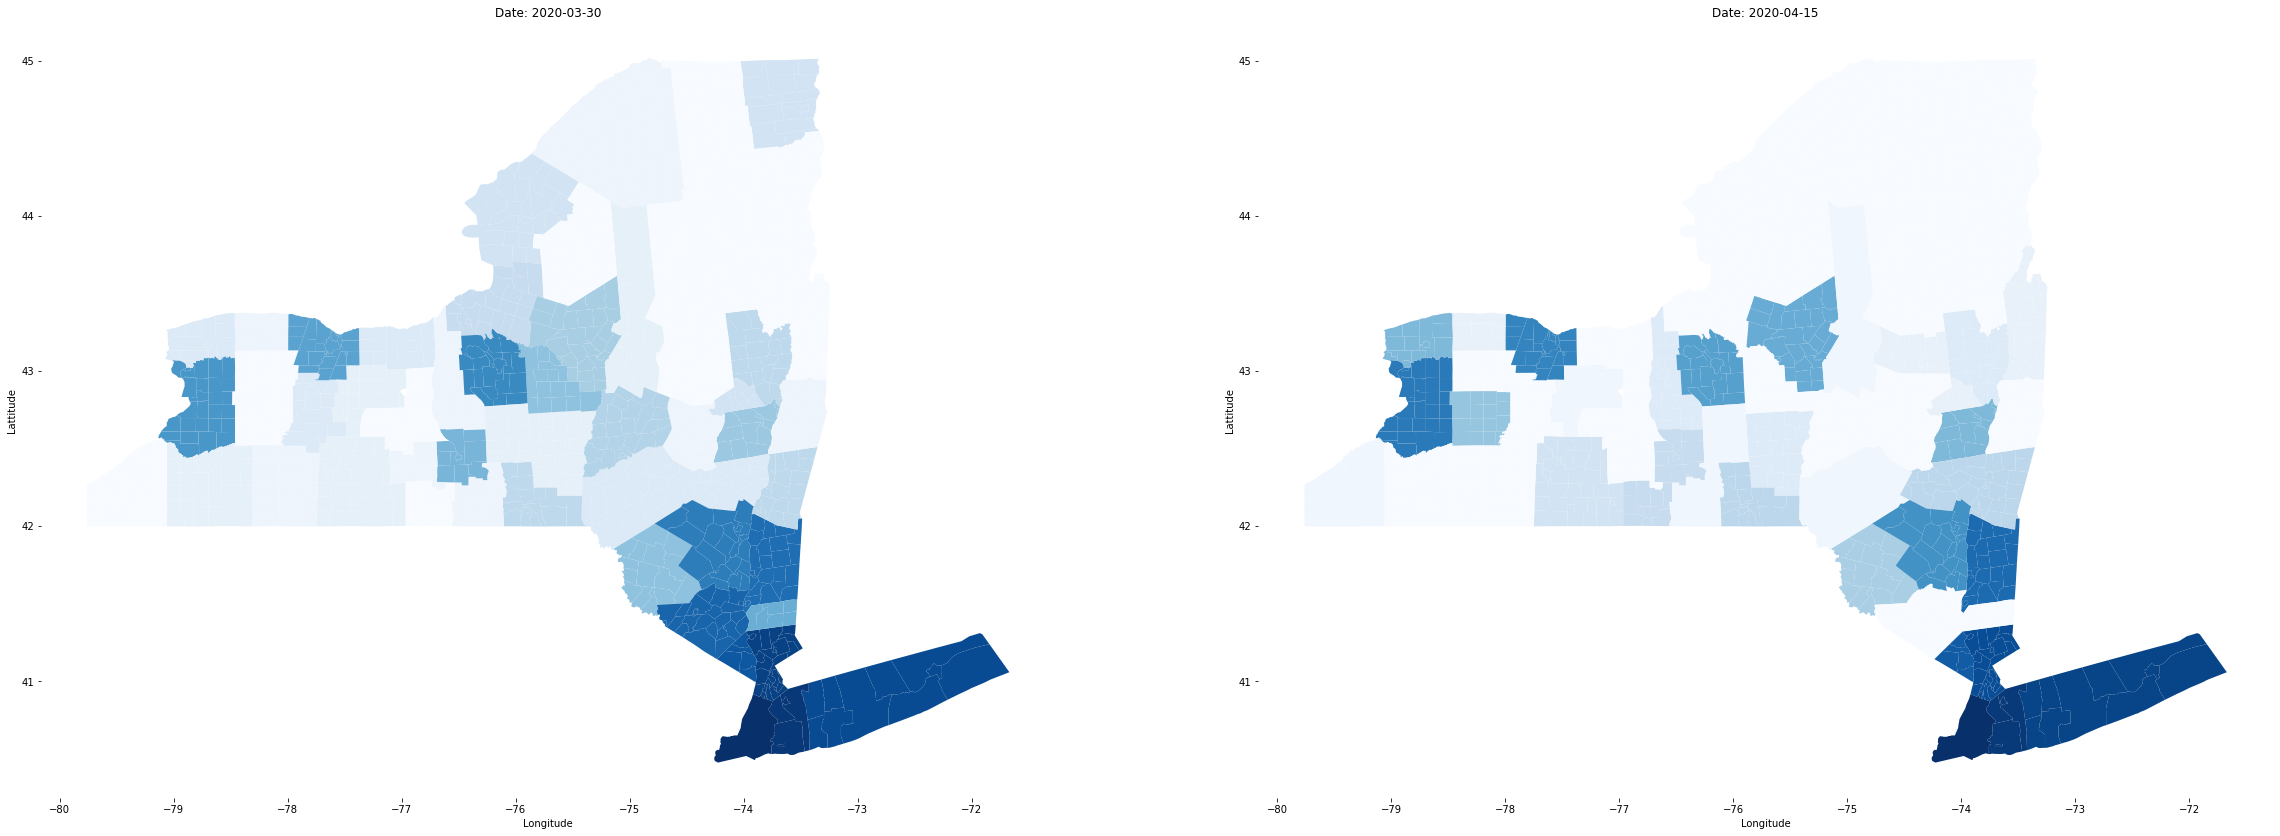

In [48]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-30',ax1),('2020-04-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

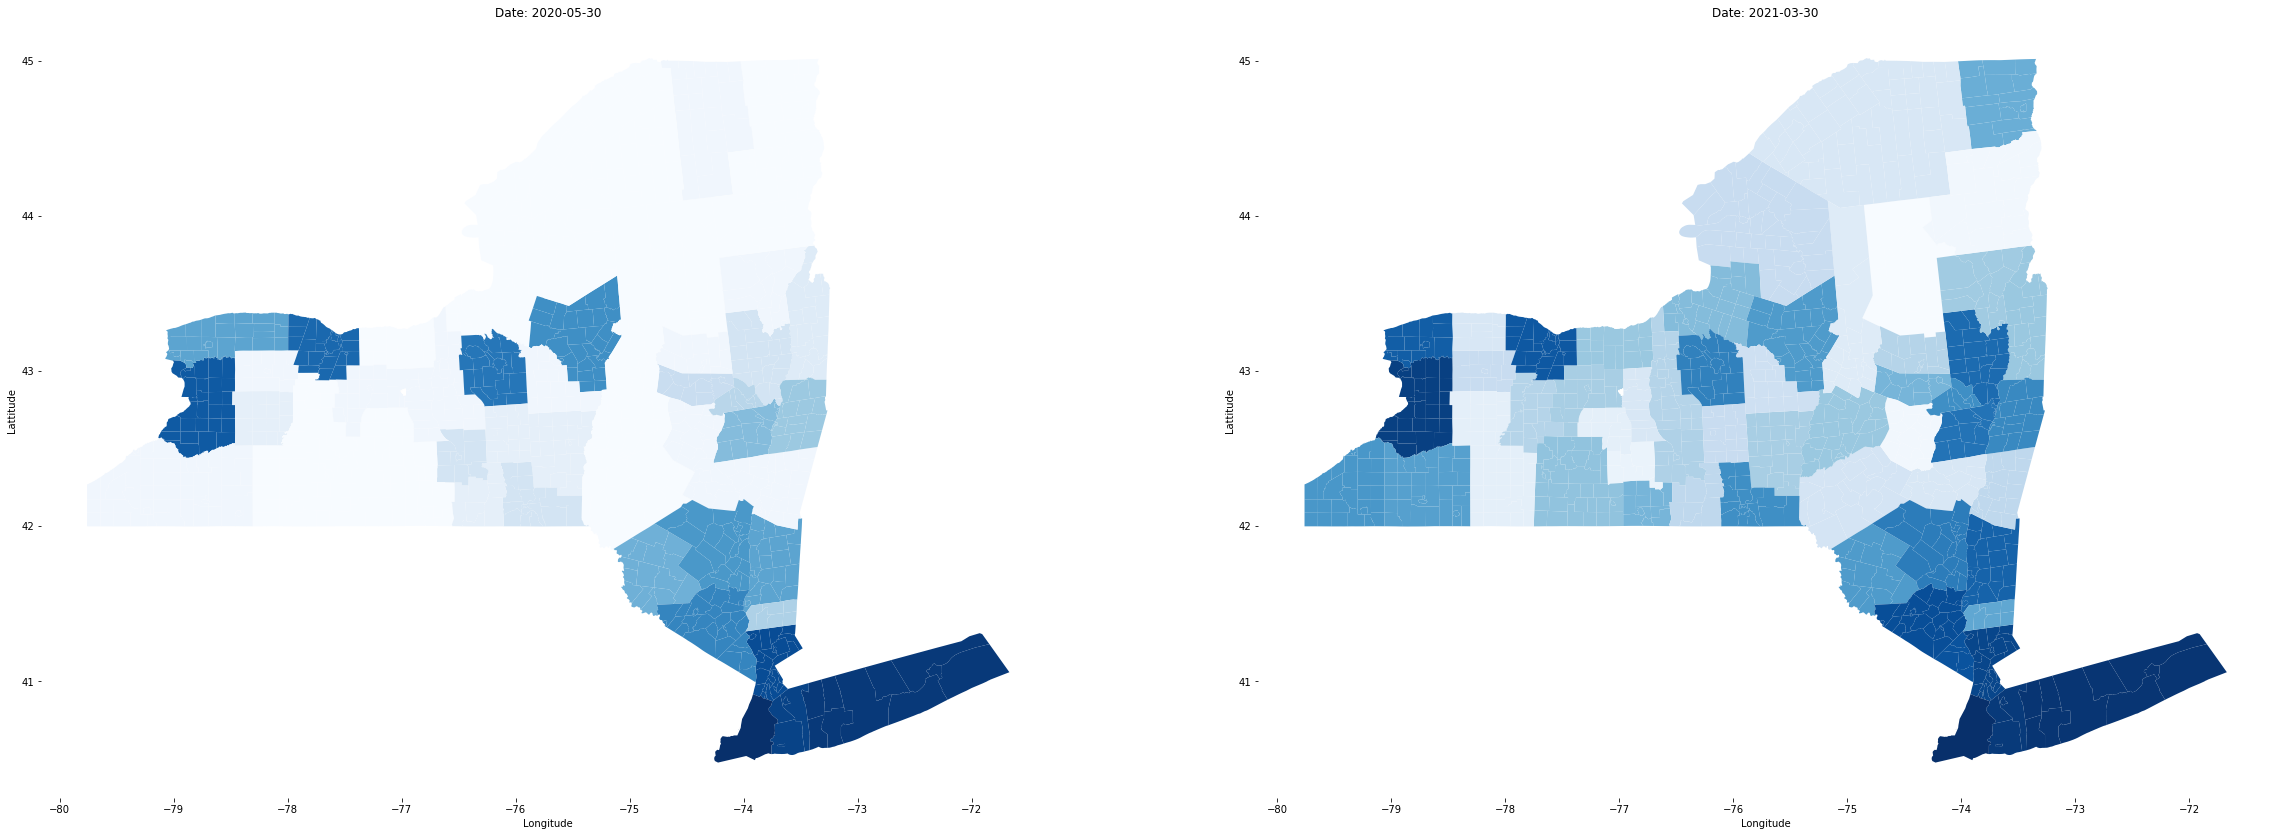

In [49]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-05-30',ax1),('2021-03-30',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

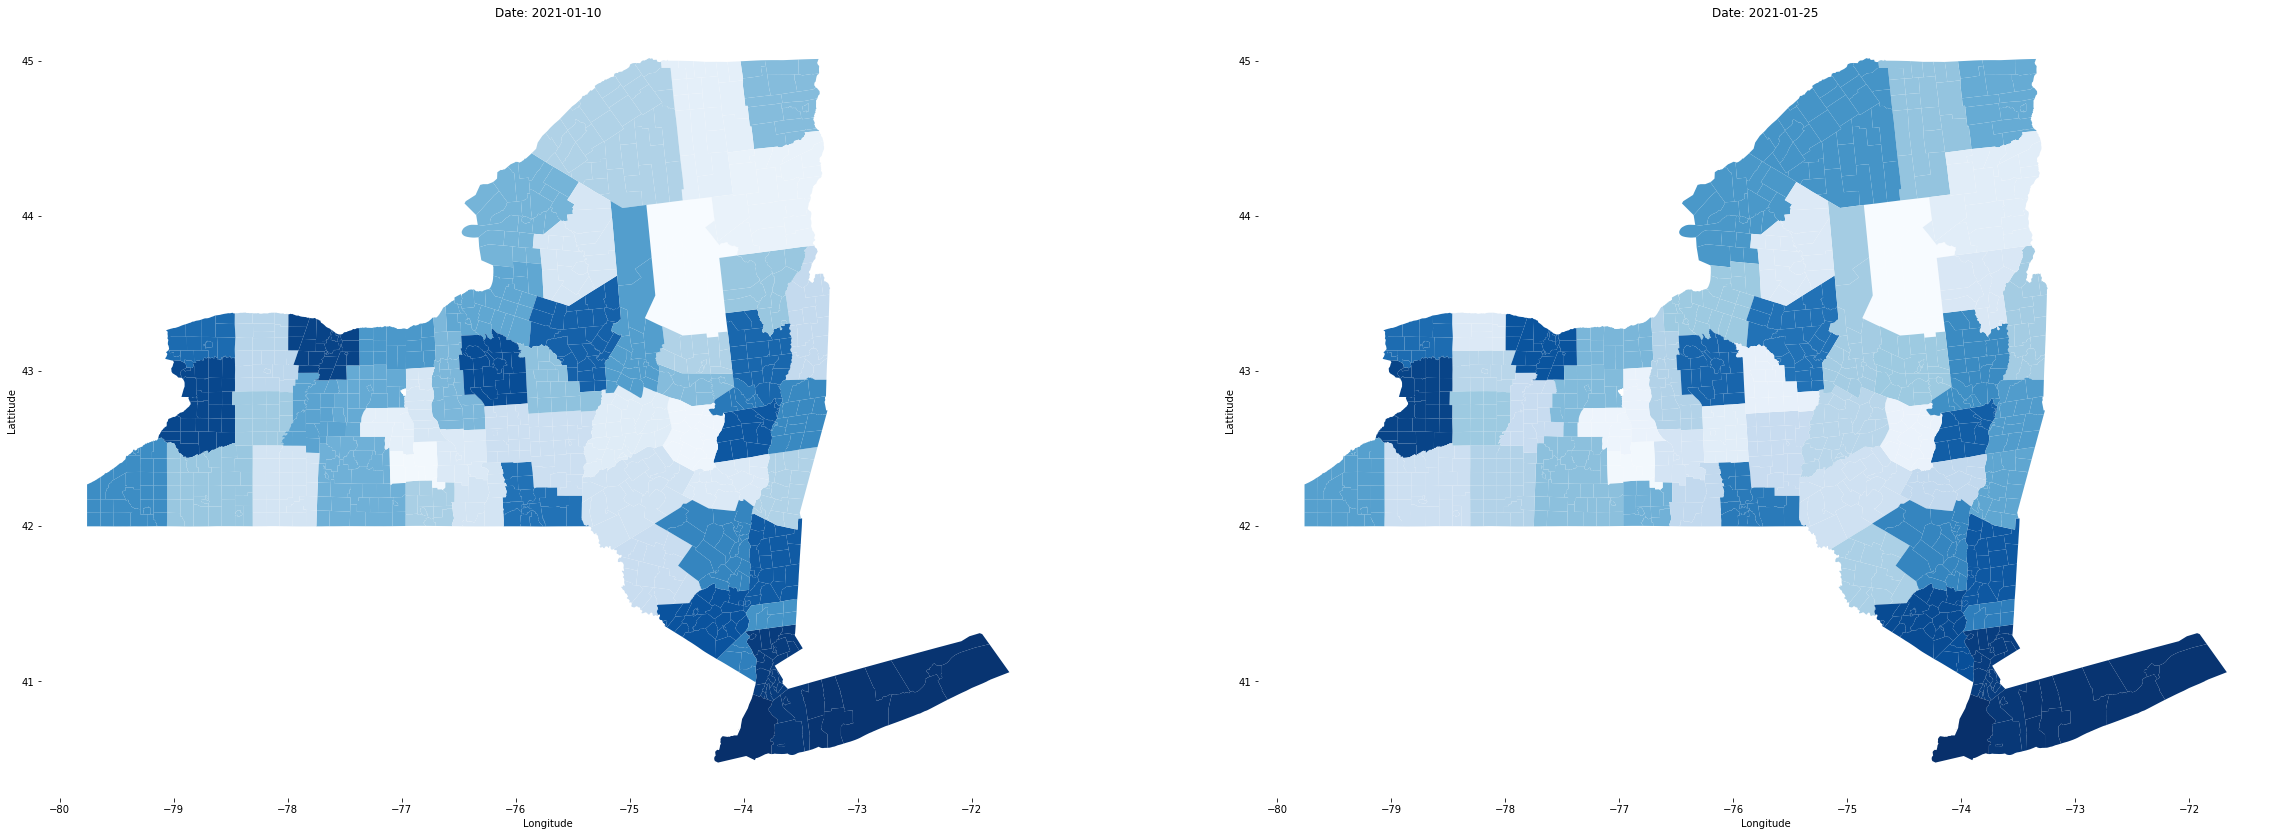

In [50]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-01-10',ax1),('2021-01-25',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

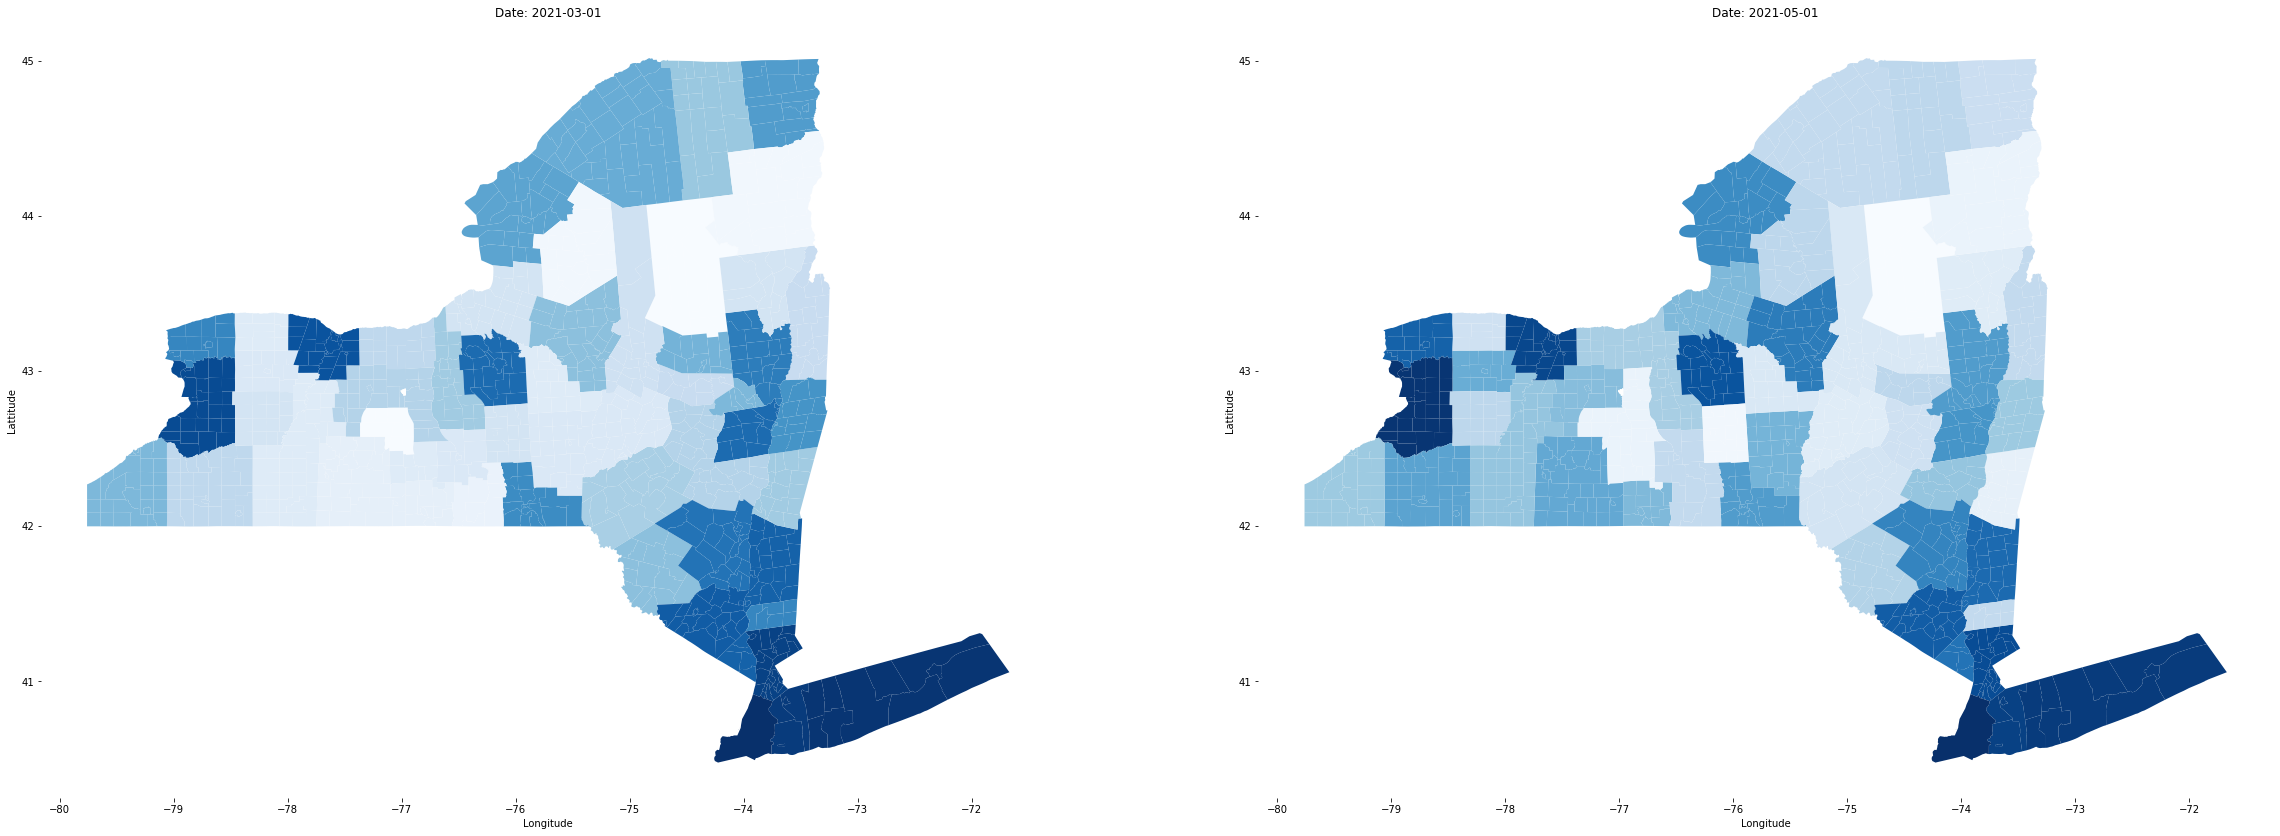

In [51]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-03-01',ax1),('2021-05-01',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

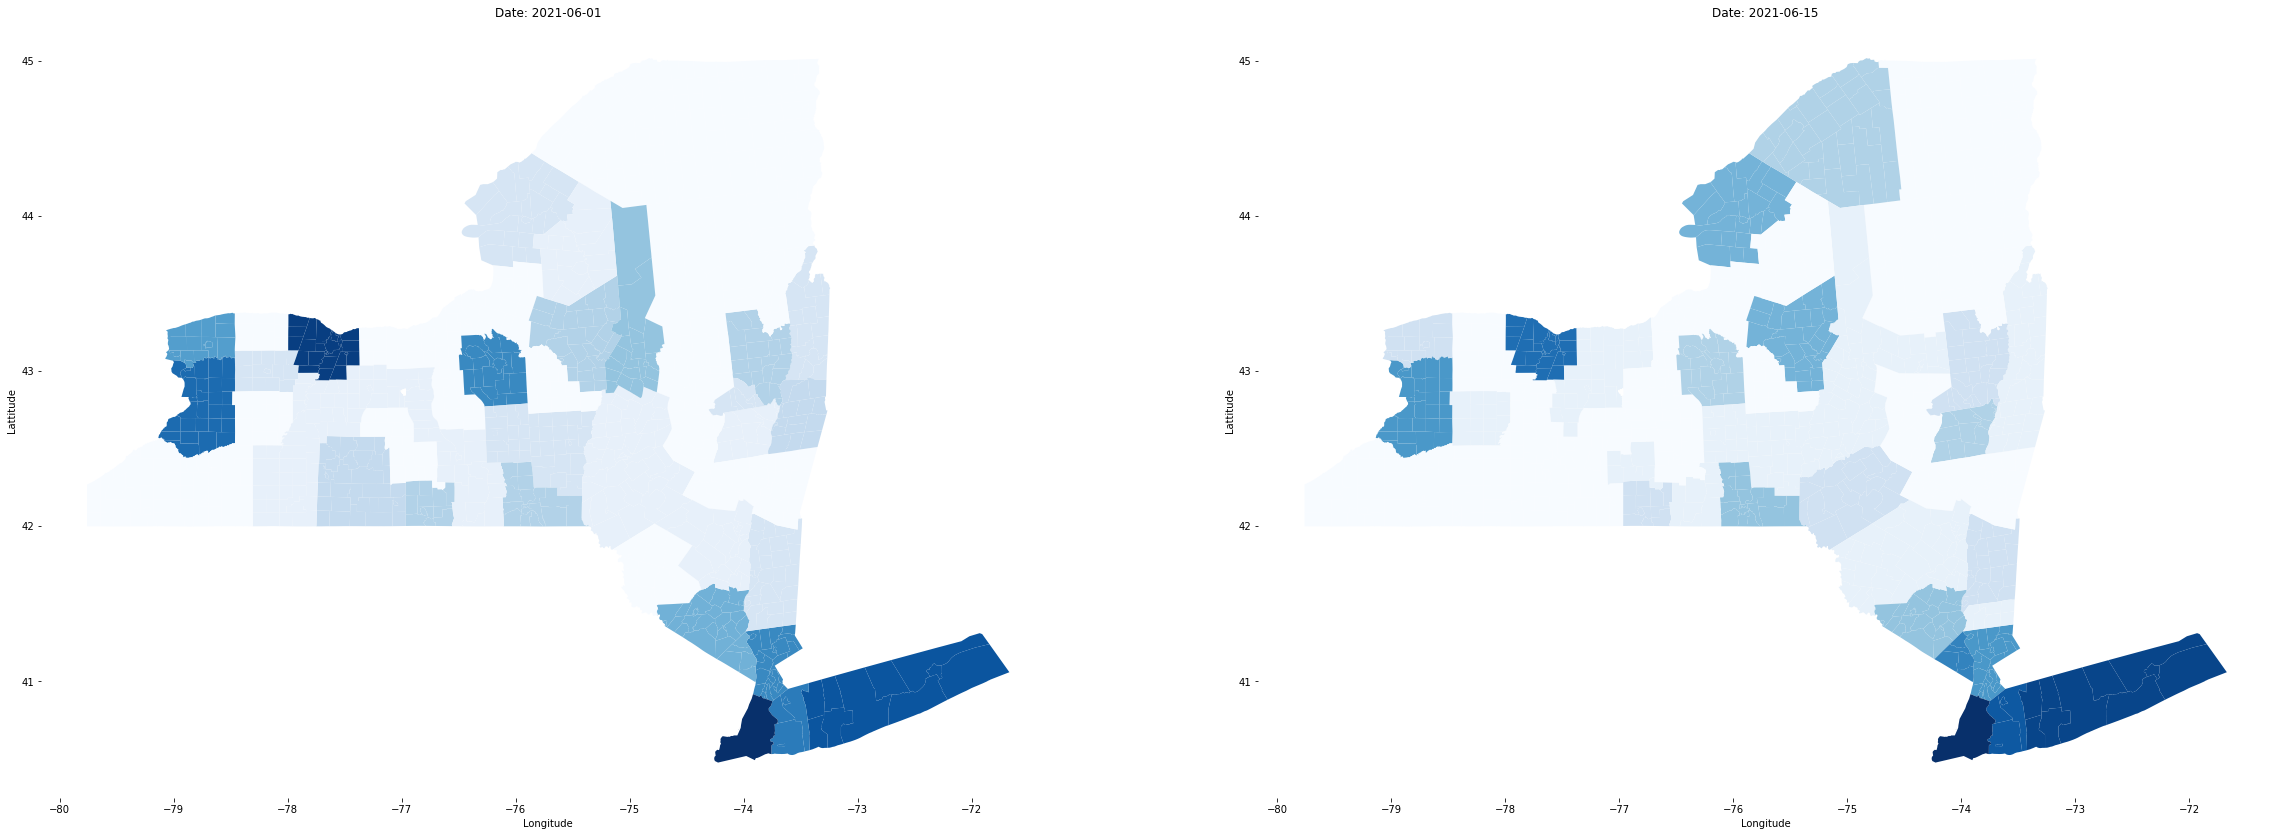

In [52]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-06-01',ax1),('2021-06-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

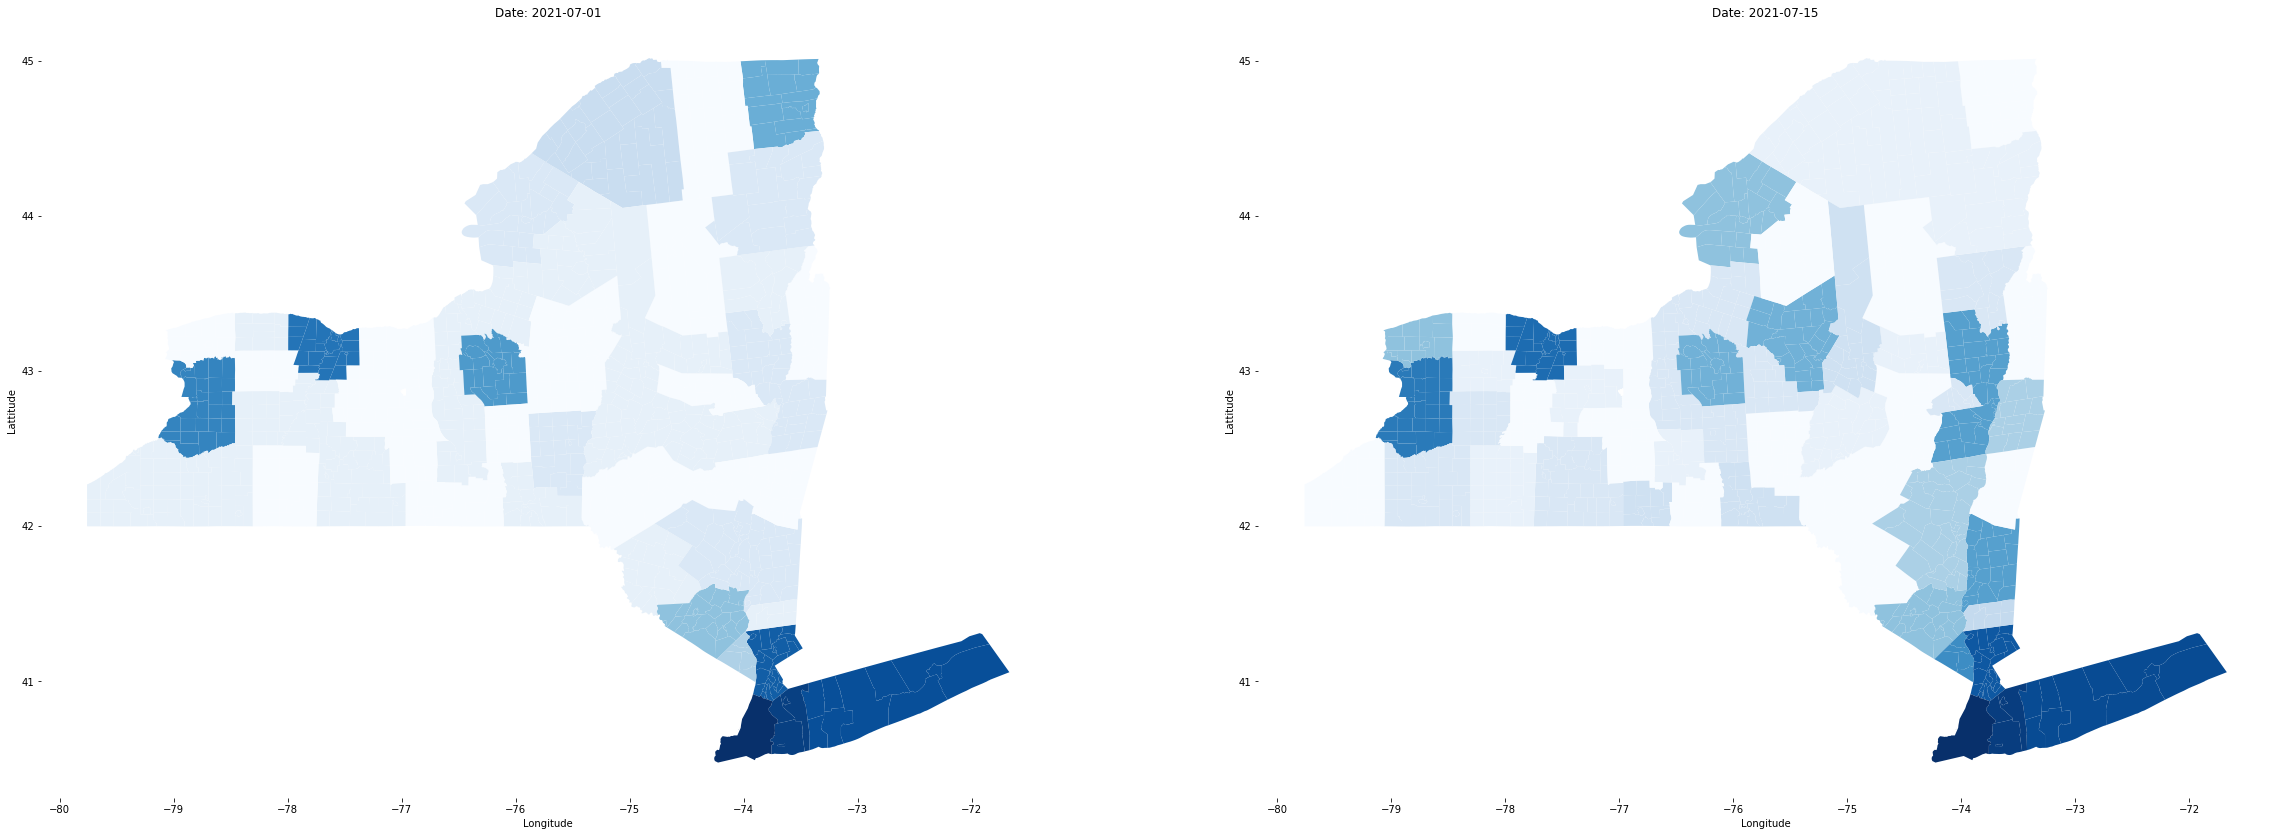

In [53]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-07-01',ax1),('2021-07-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

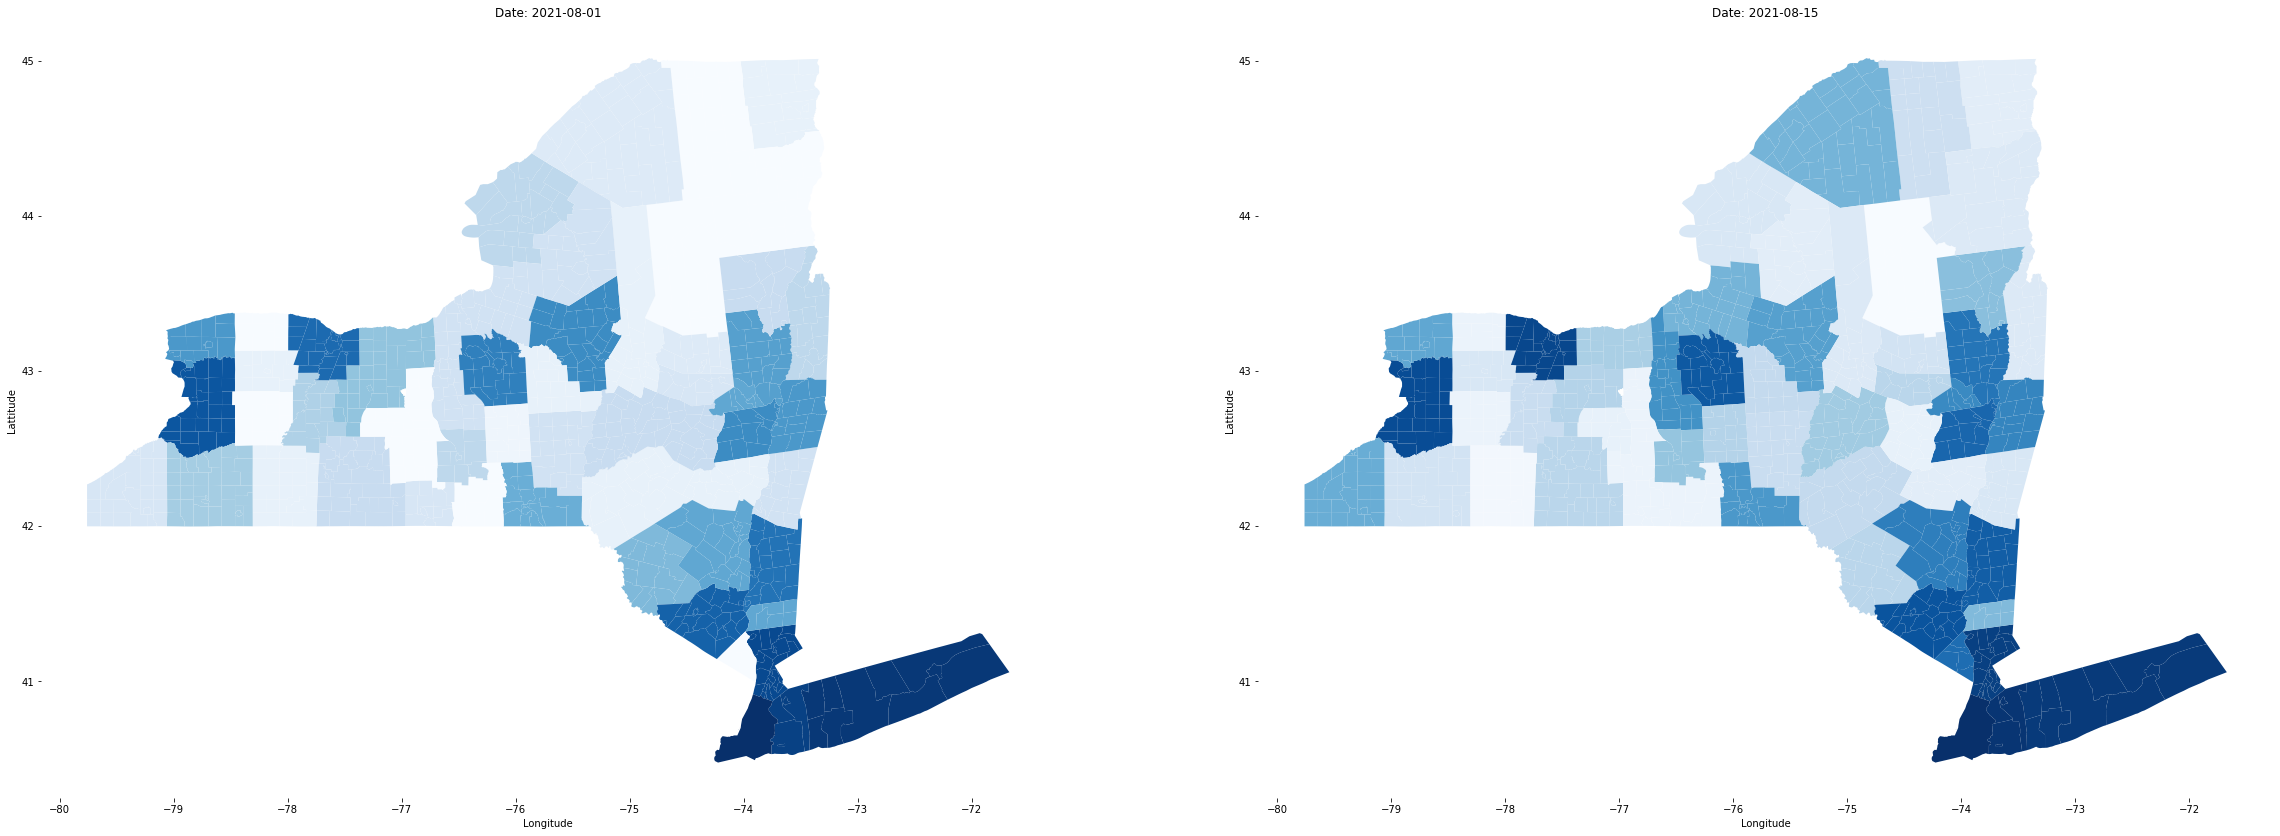

In [54]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-08-01',ax1),('2021-08-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

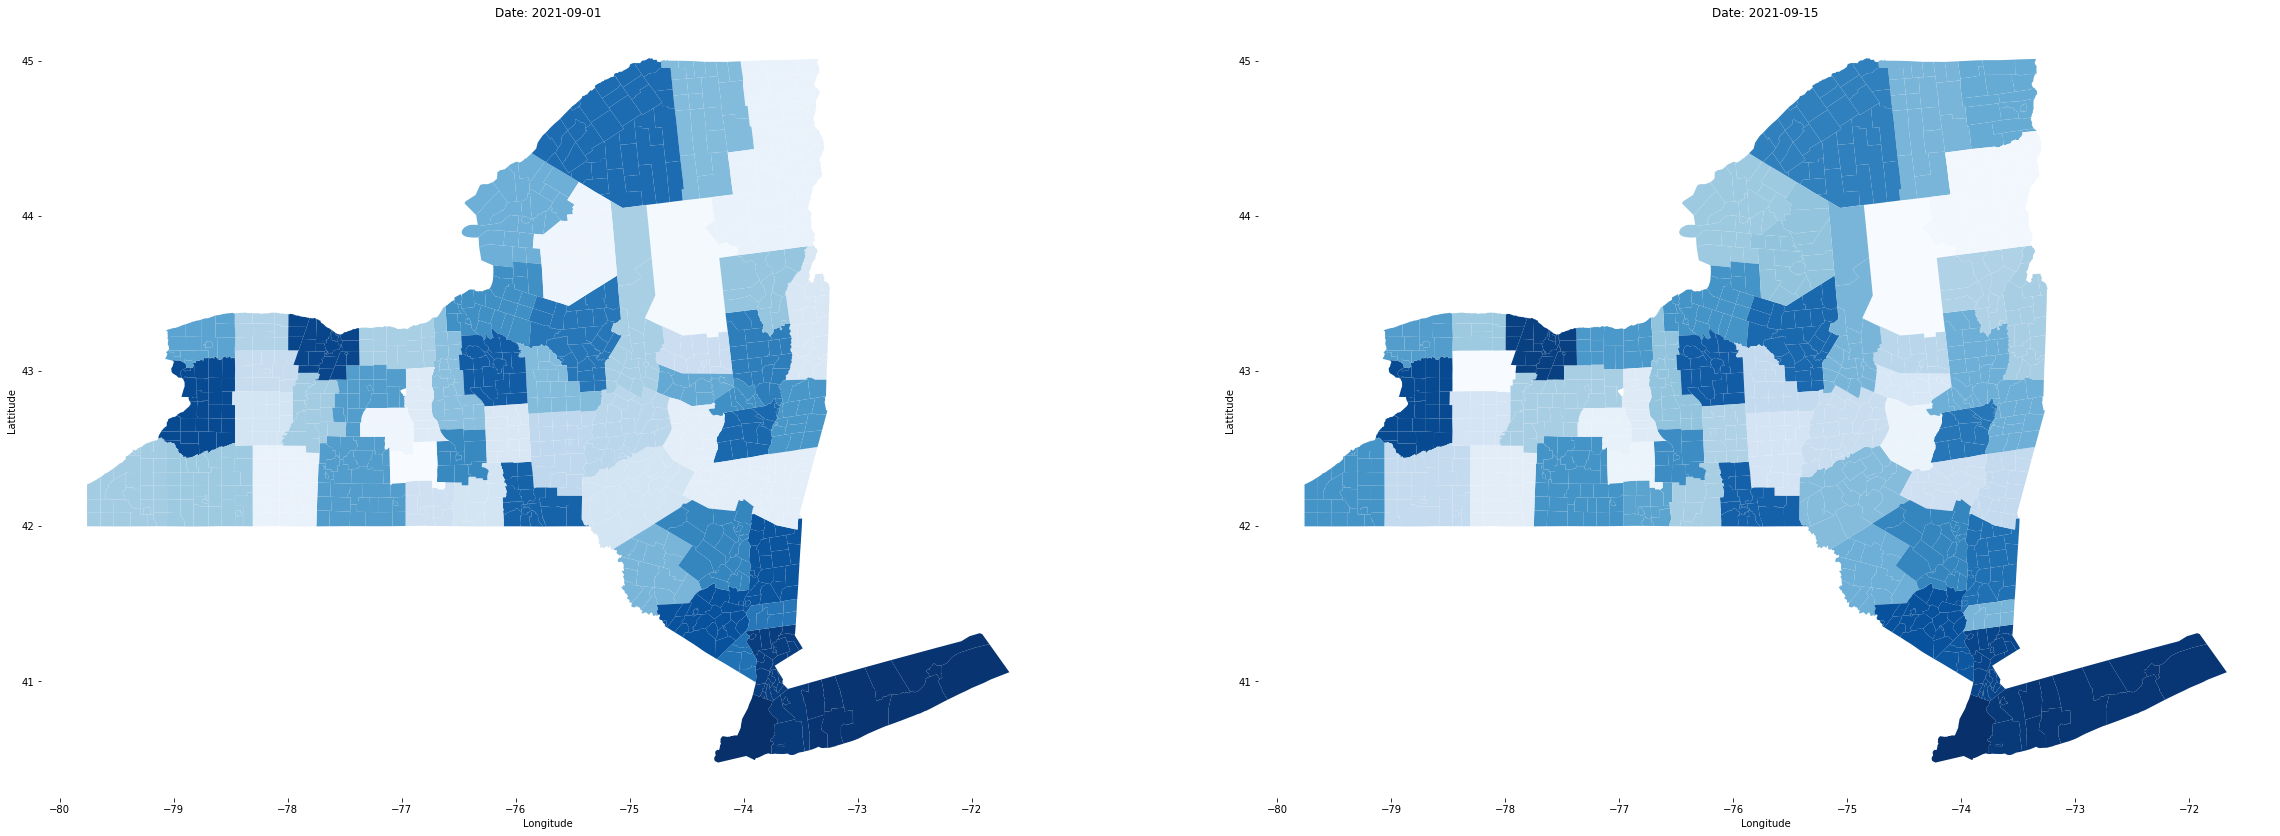

In [55]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-09-01',ax1),('2021-09-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

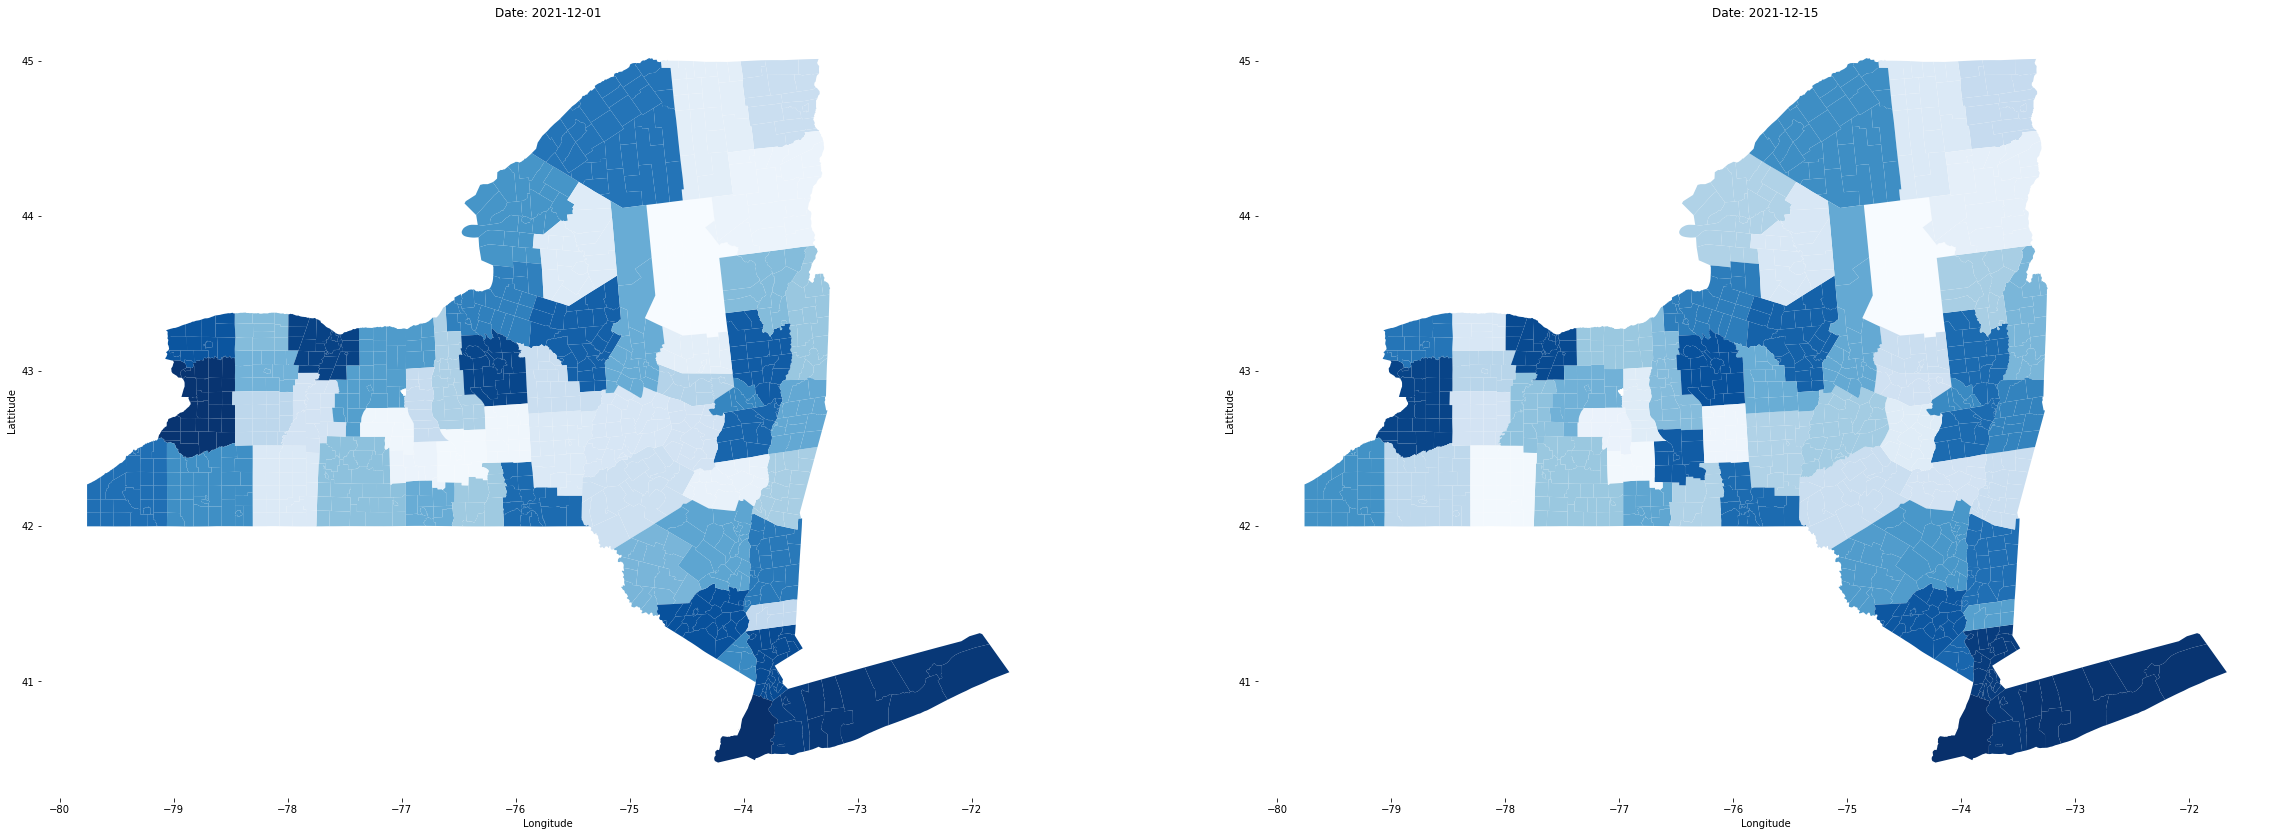

In [56]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-12-01',ax1),('2021-12-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

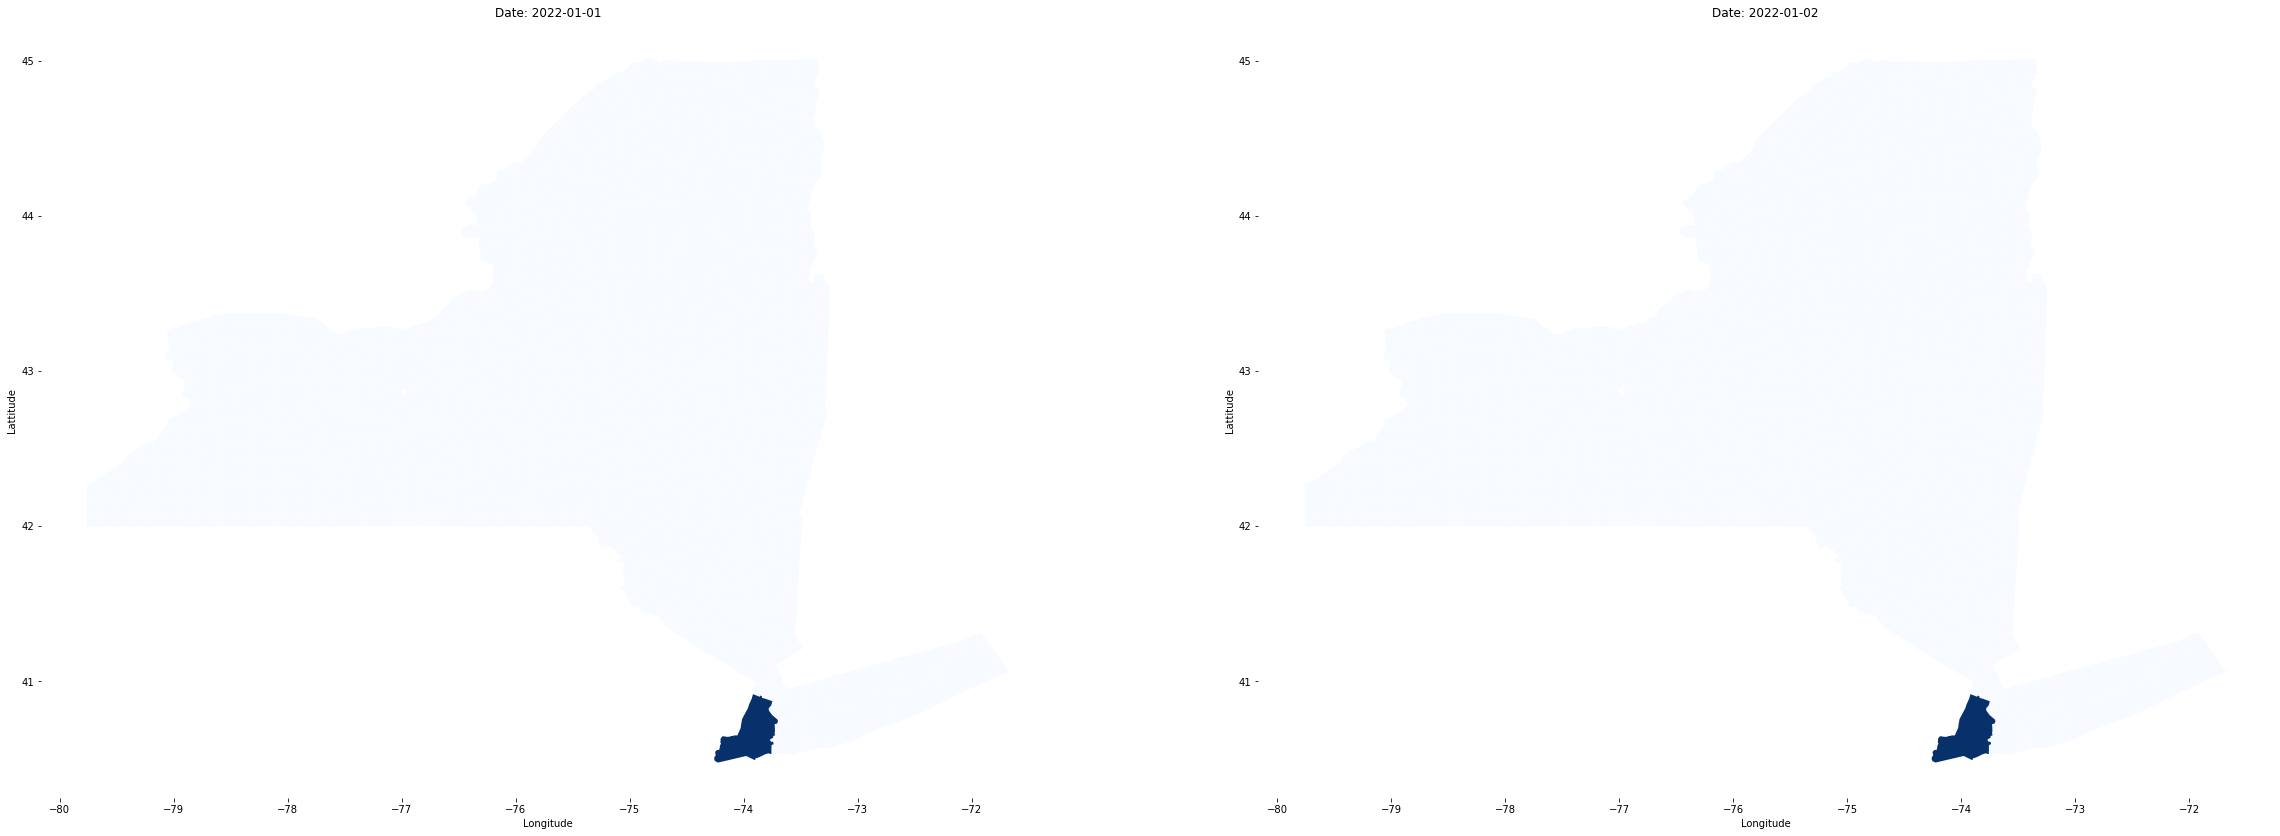

In [57]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-01',ax1),('2022-01-02',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

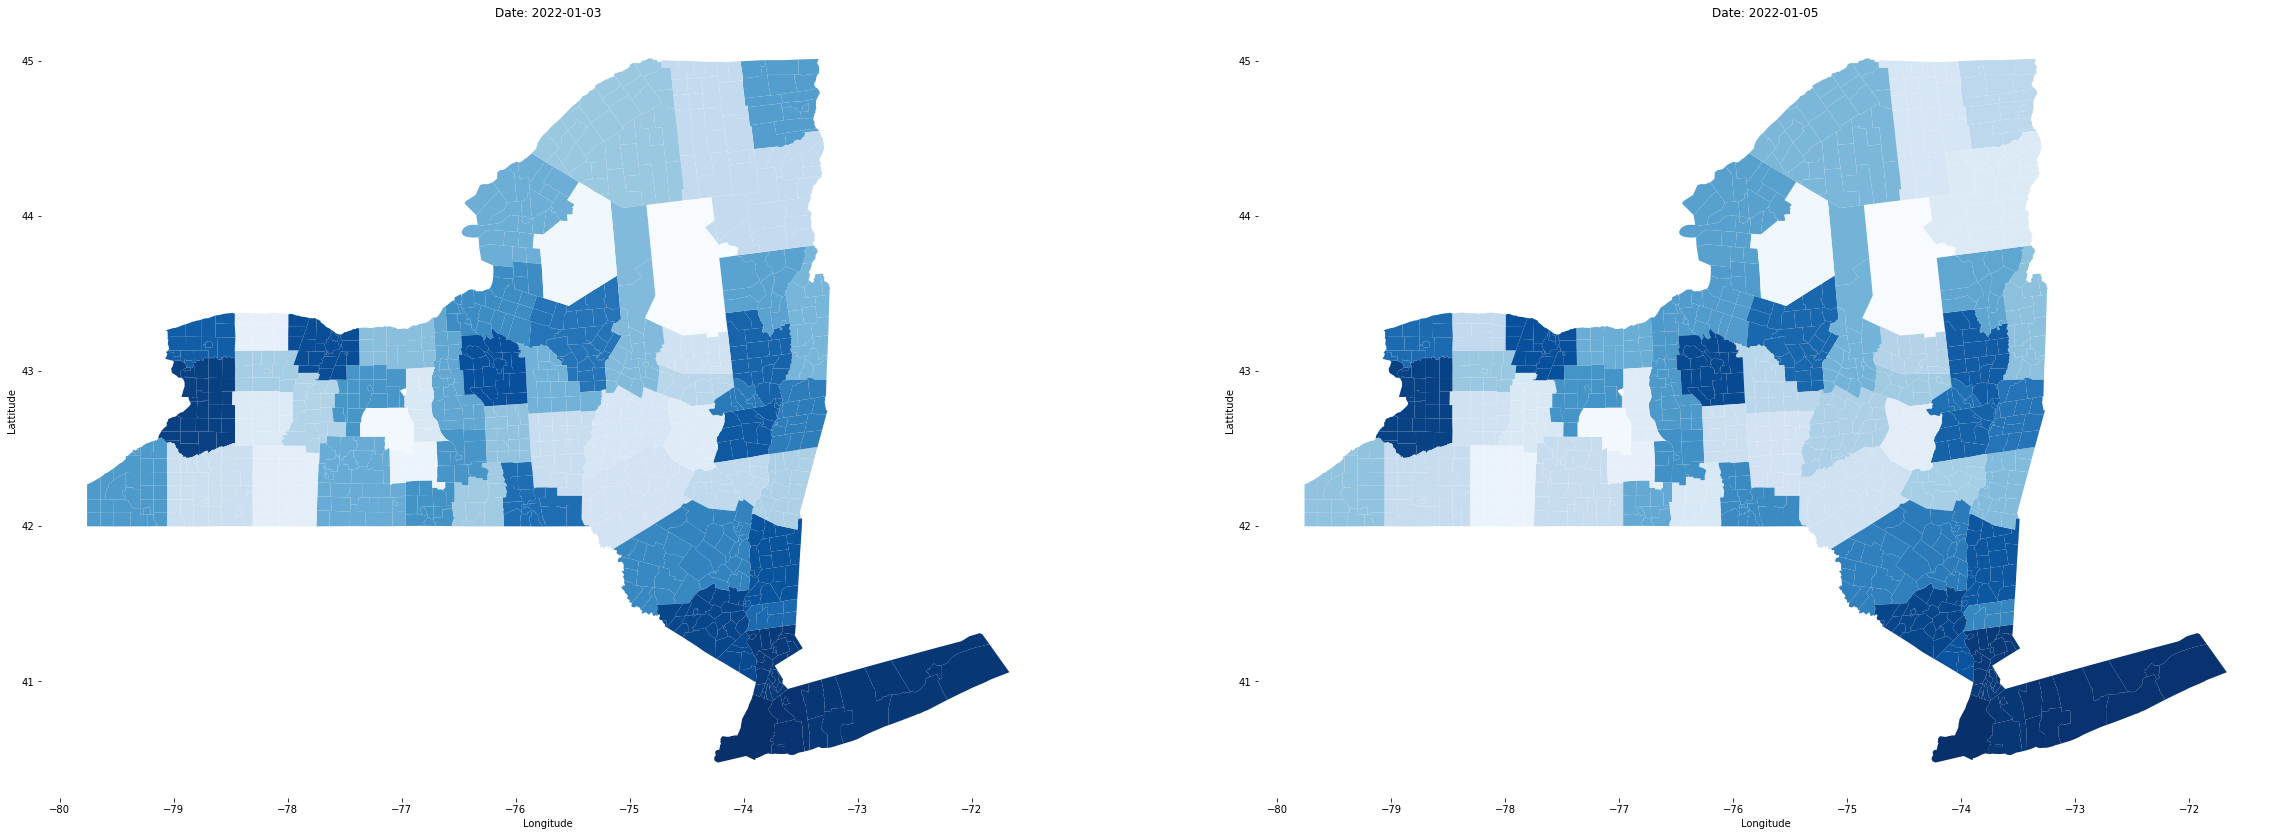

In [58]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-03',ax1),('2022-01-05',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

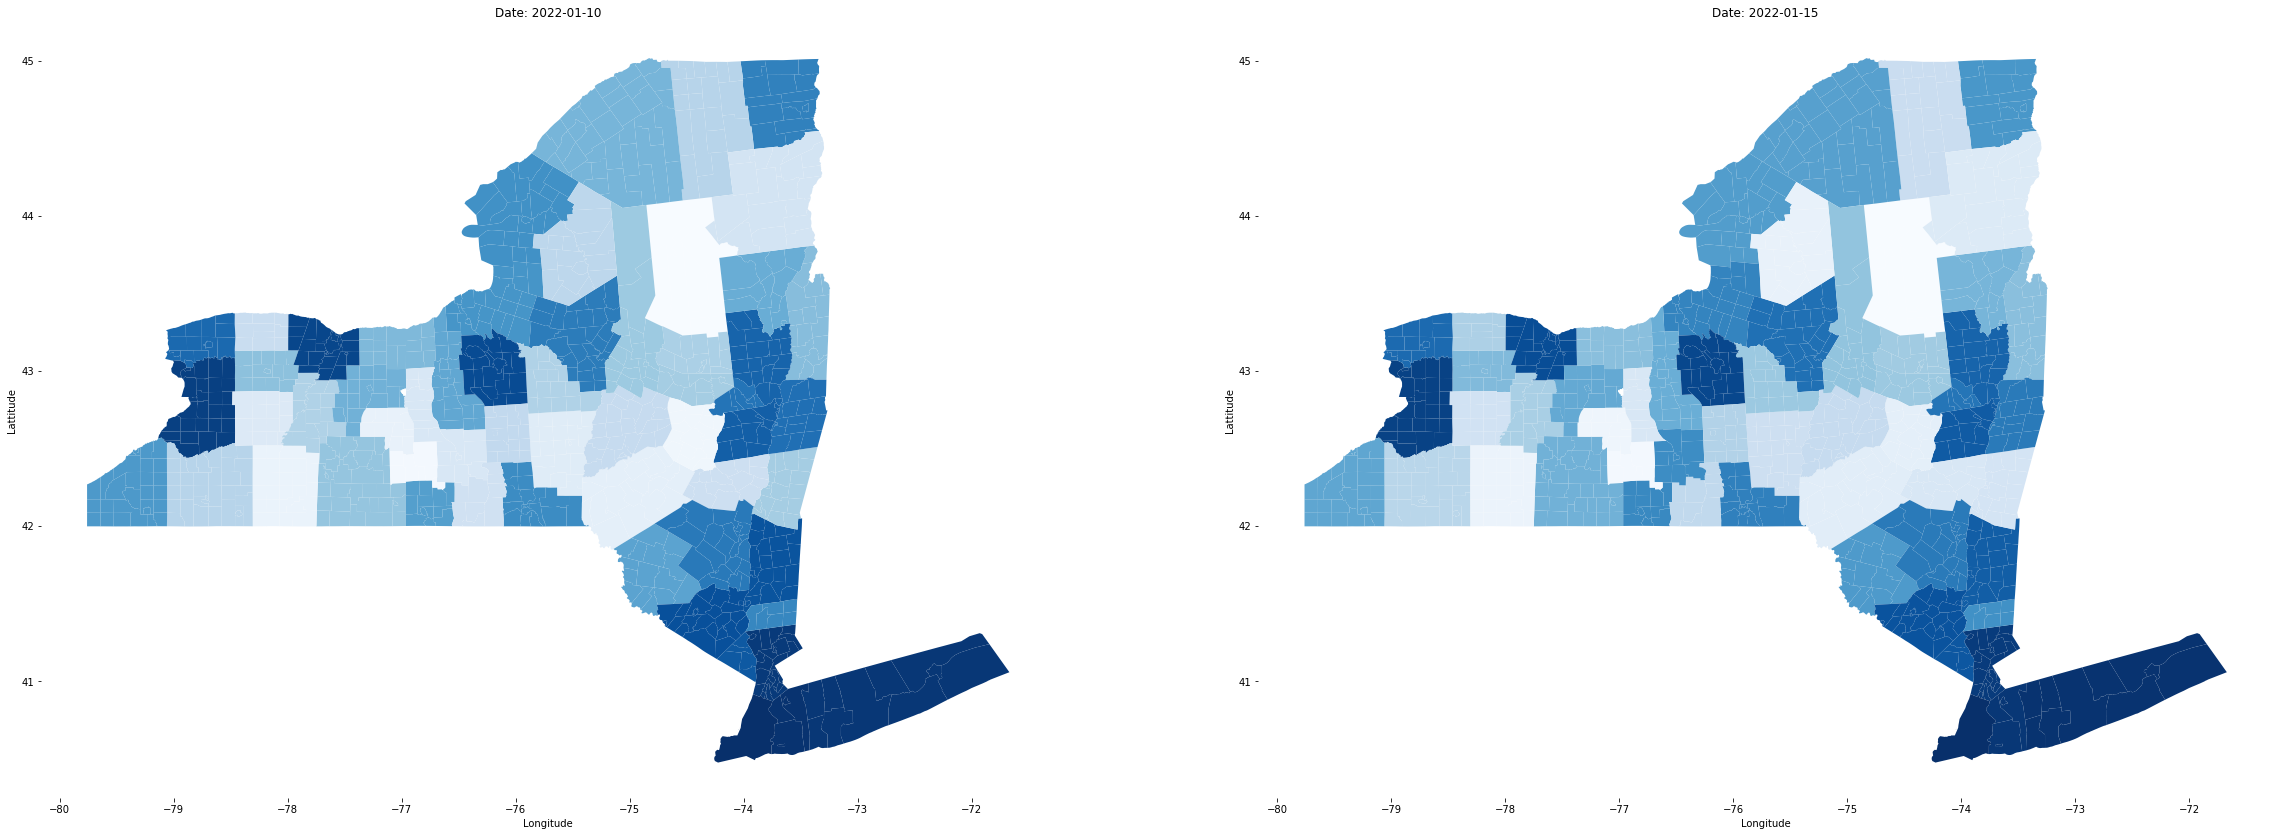

In [59]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-10',ax1),('2022-01-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

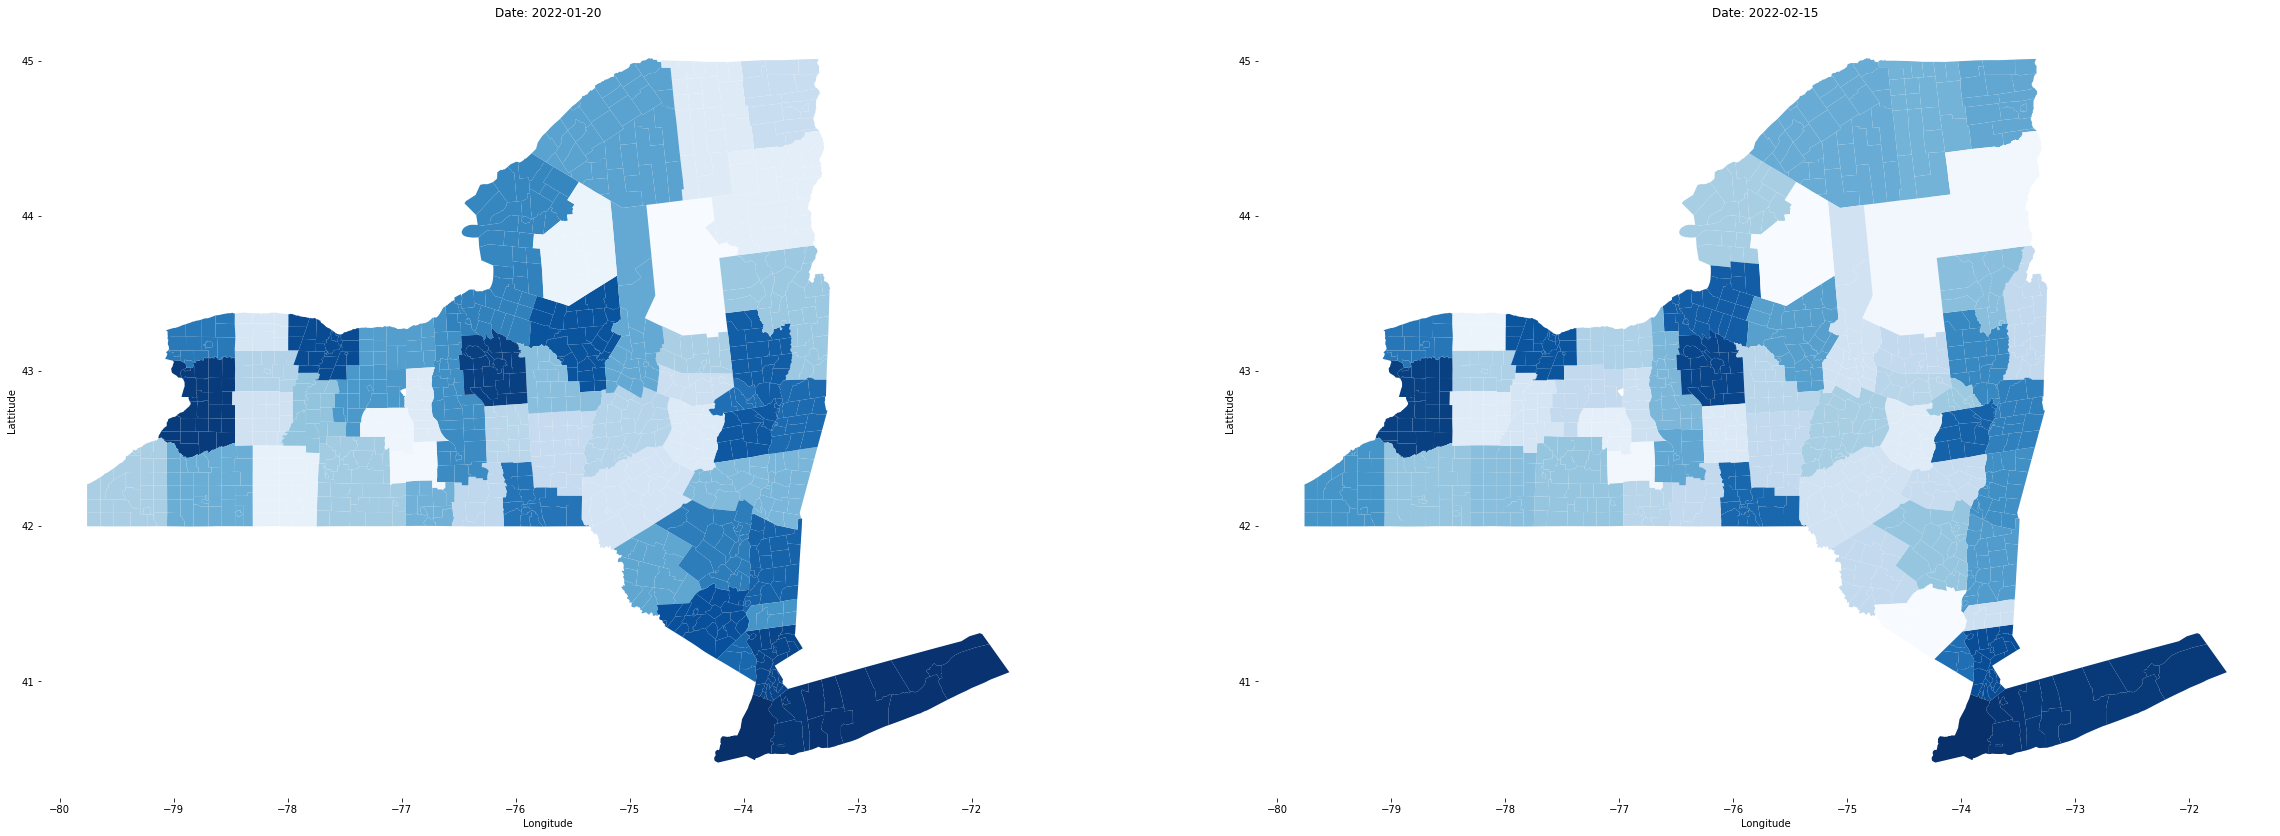

In [60]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-20',ax1),('2022-02-15',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

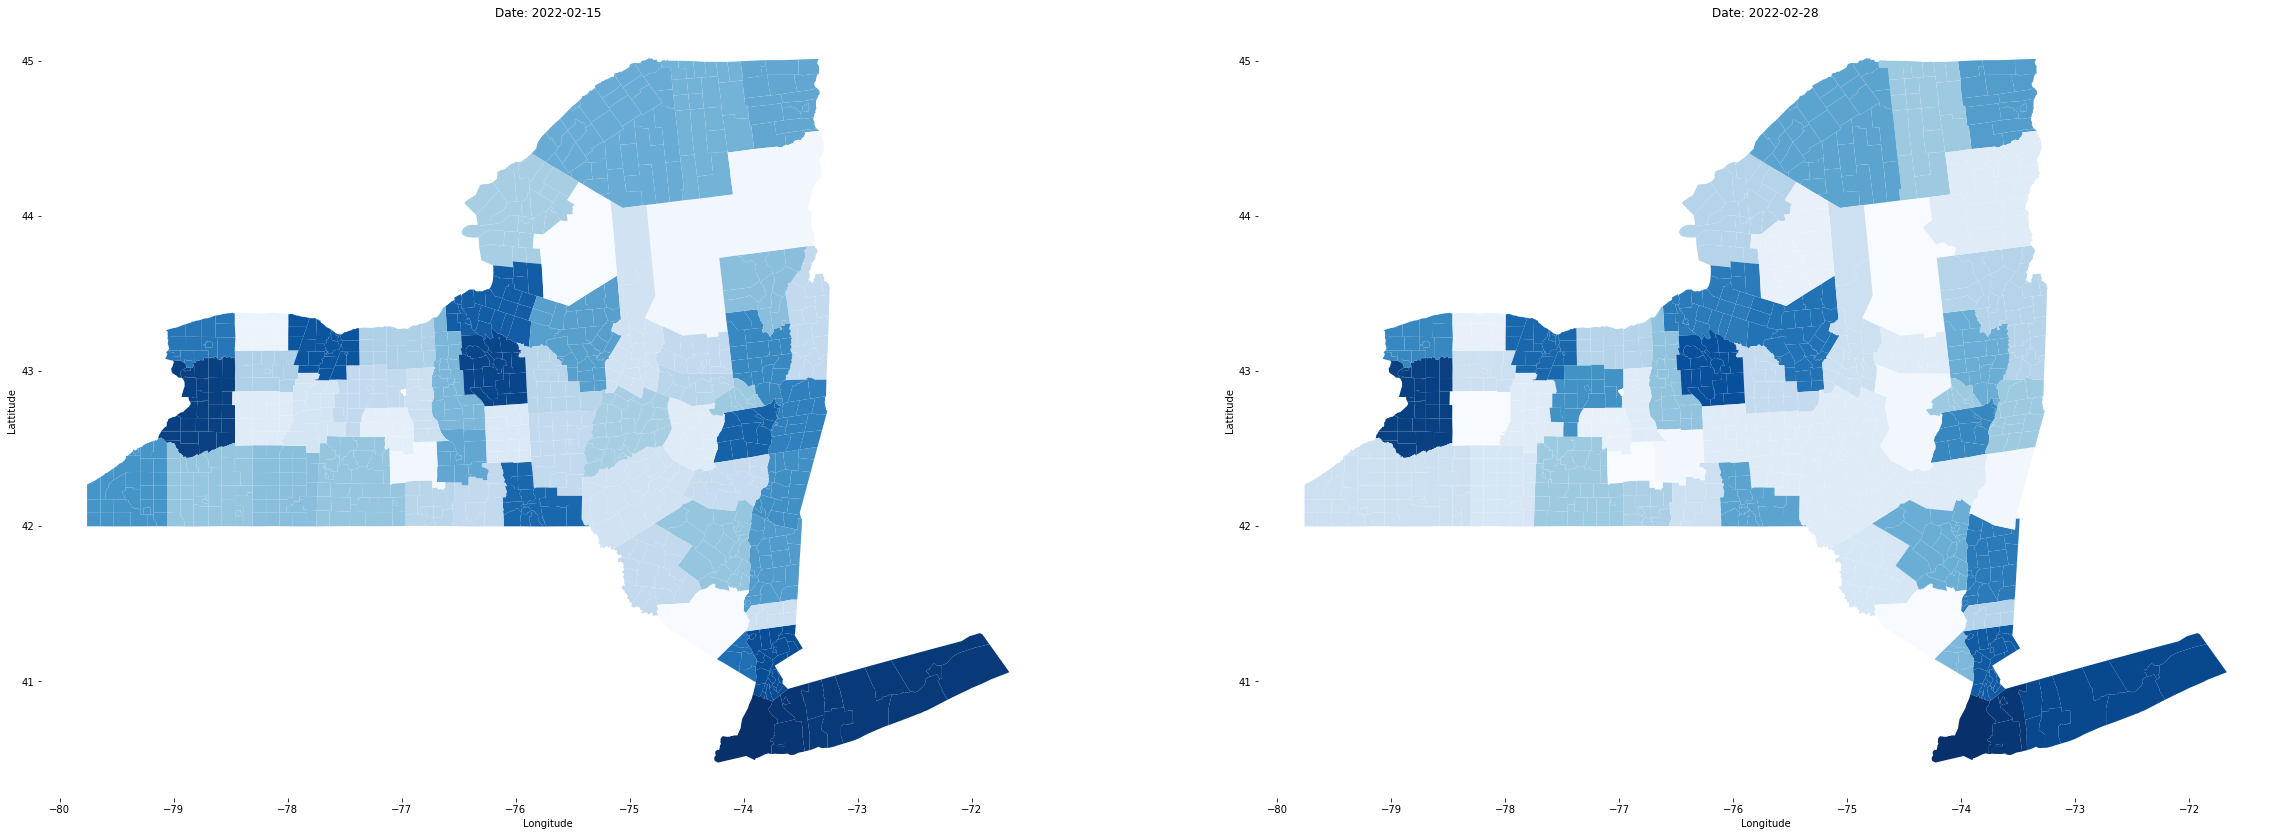

In [61]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-02-15',ax1),('2022-02-28',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

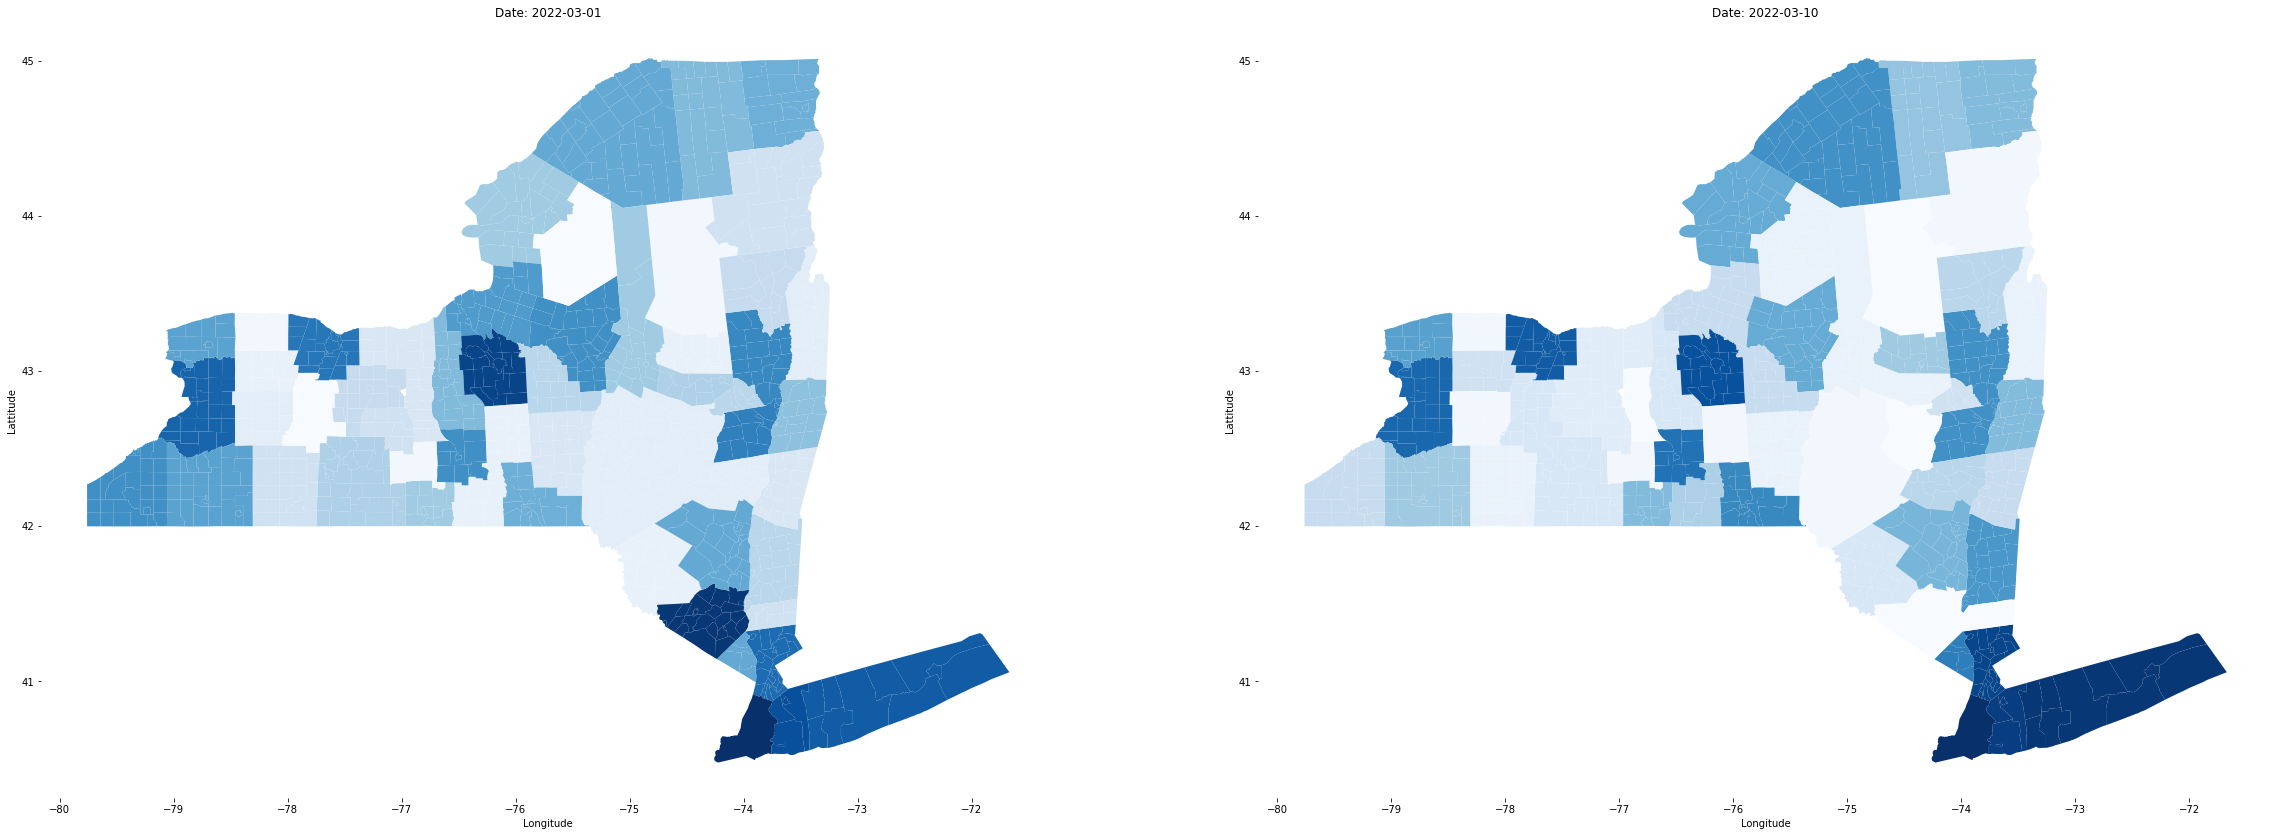

In [62]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-03-01',ax1),('2022-03-10',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

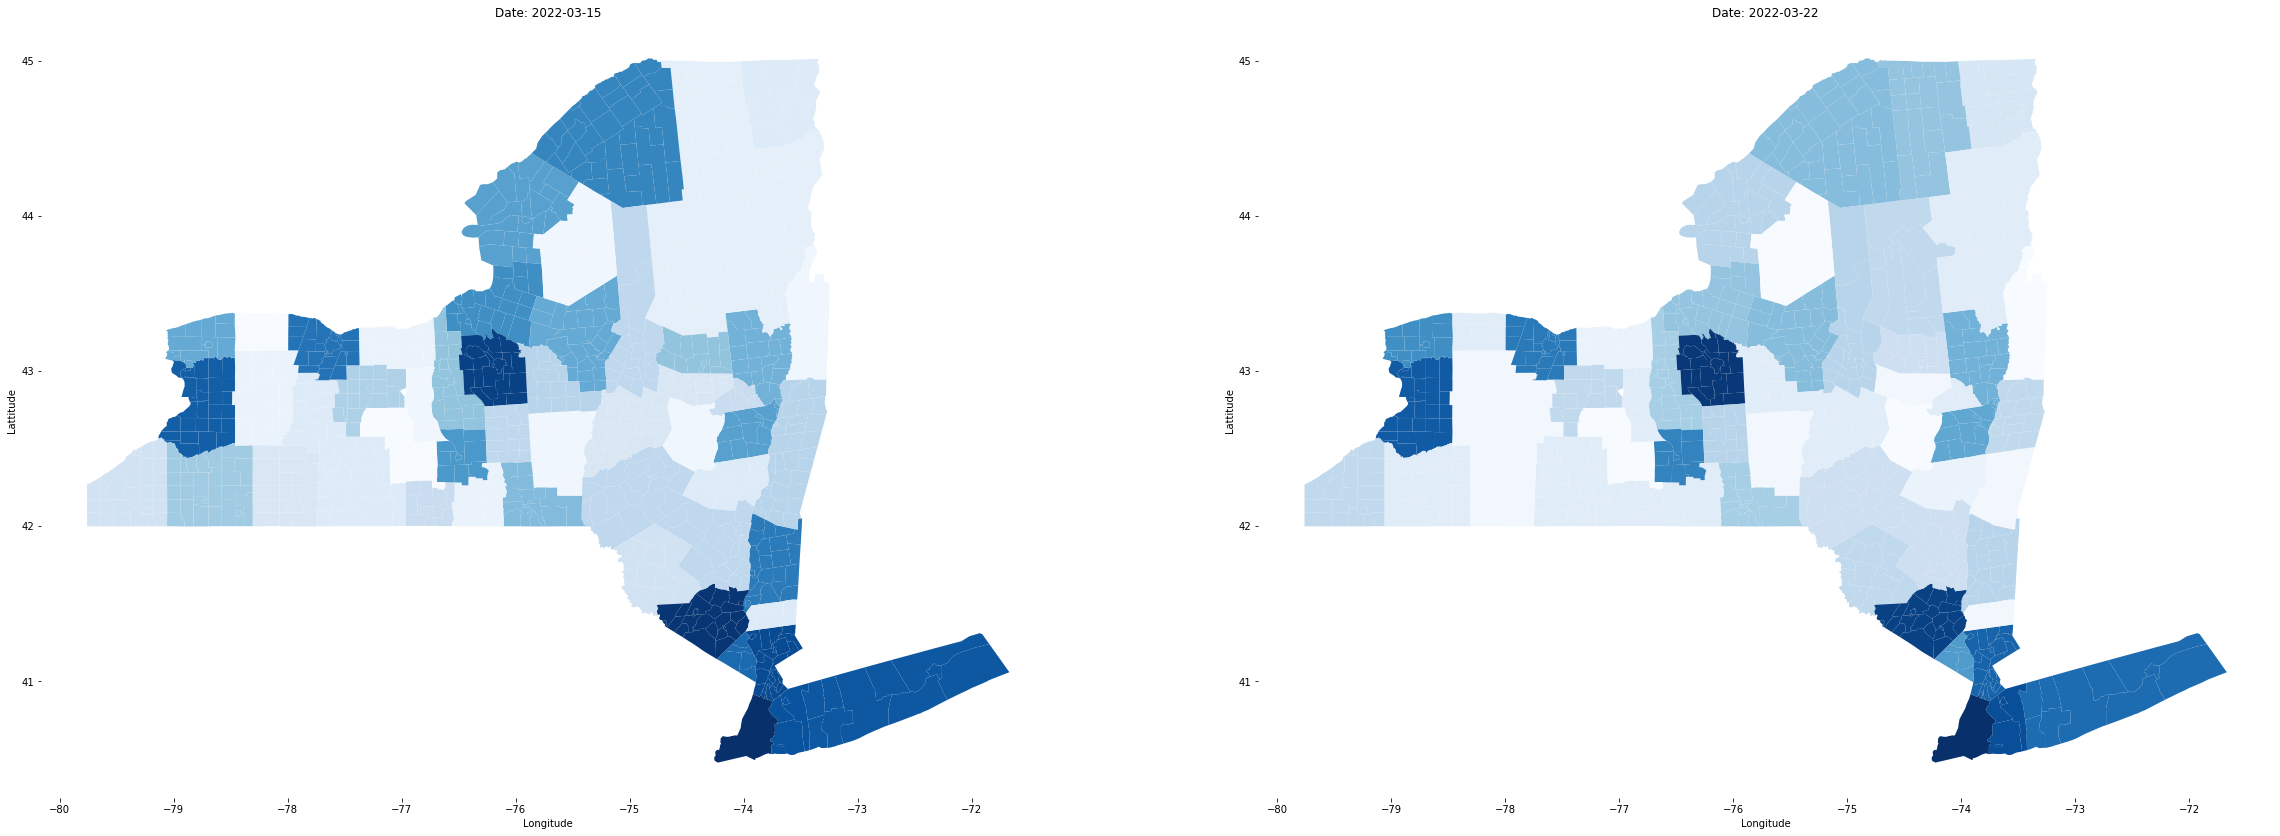

In [63]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-03-15',ax1),('2022-03-22',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

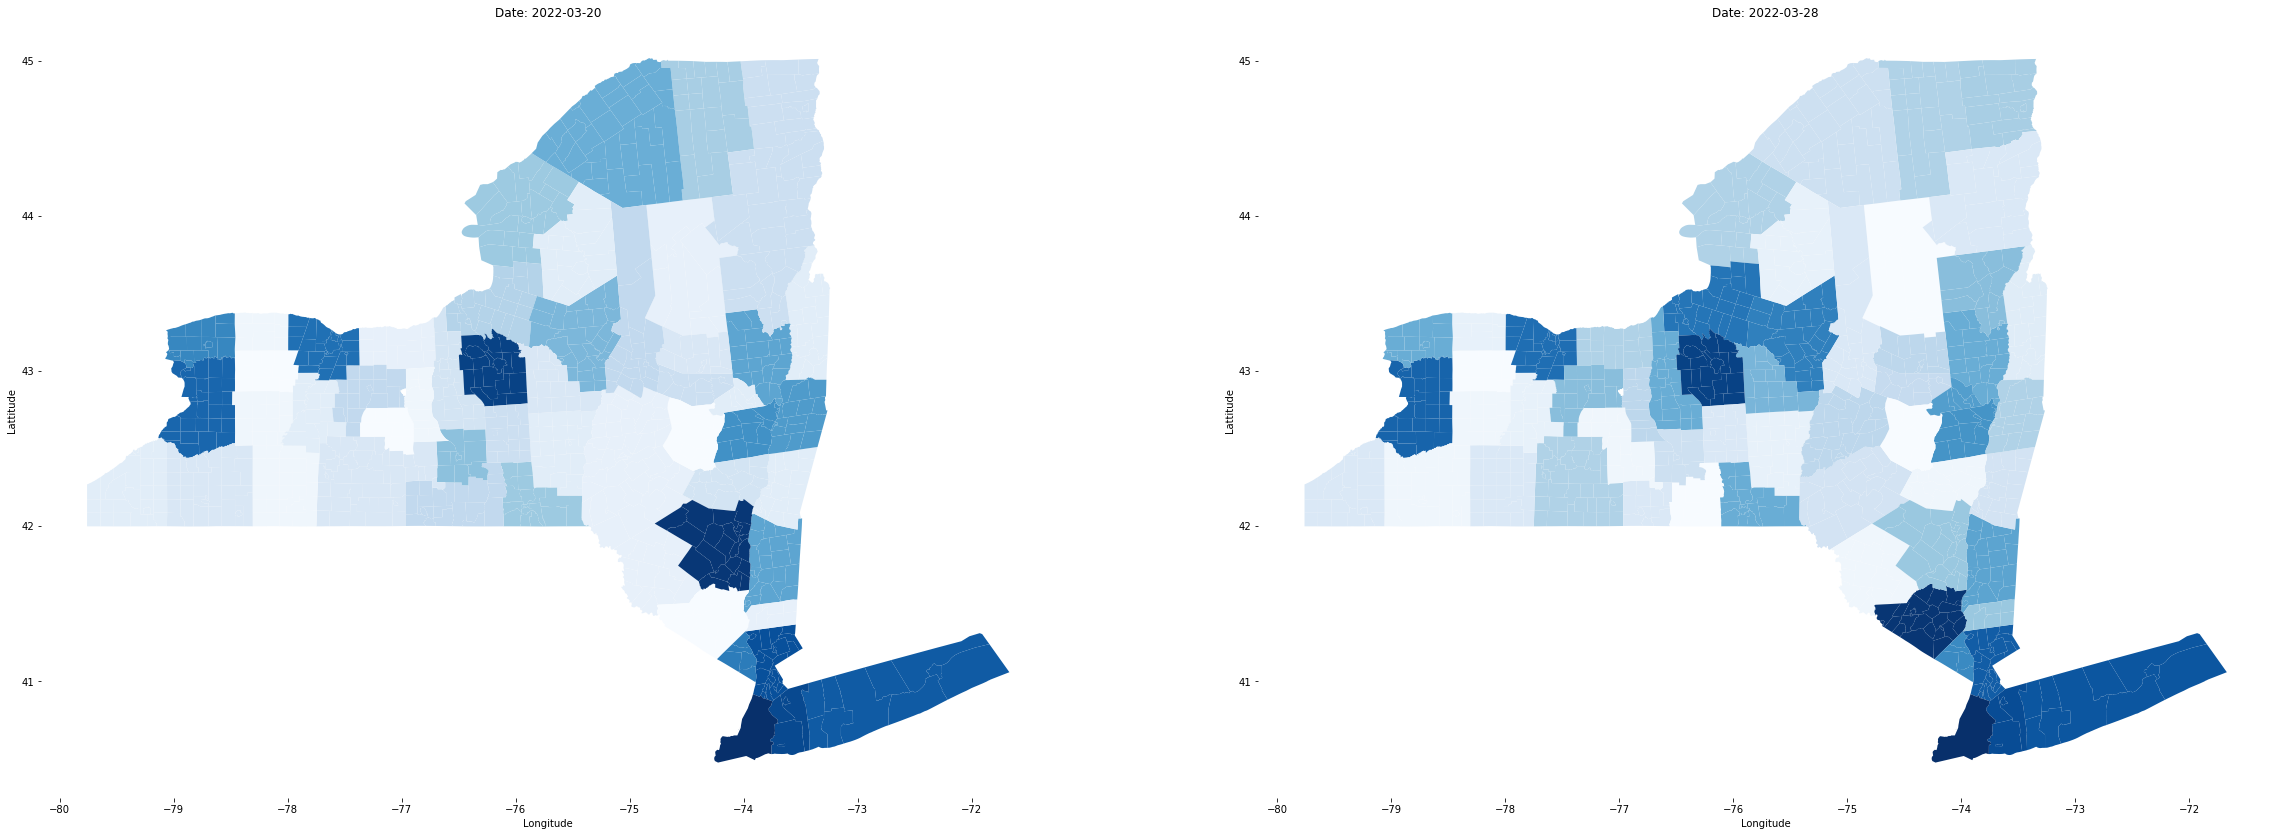

In [64]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-03-20',ax1),('2022-03-28',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

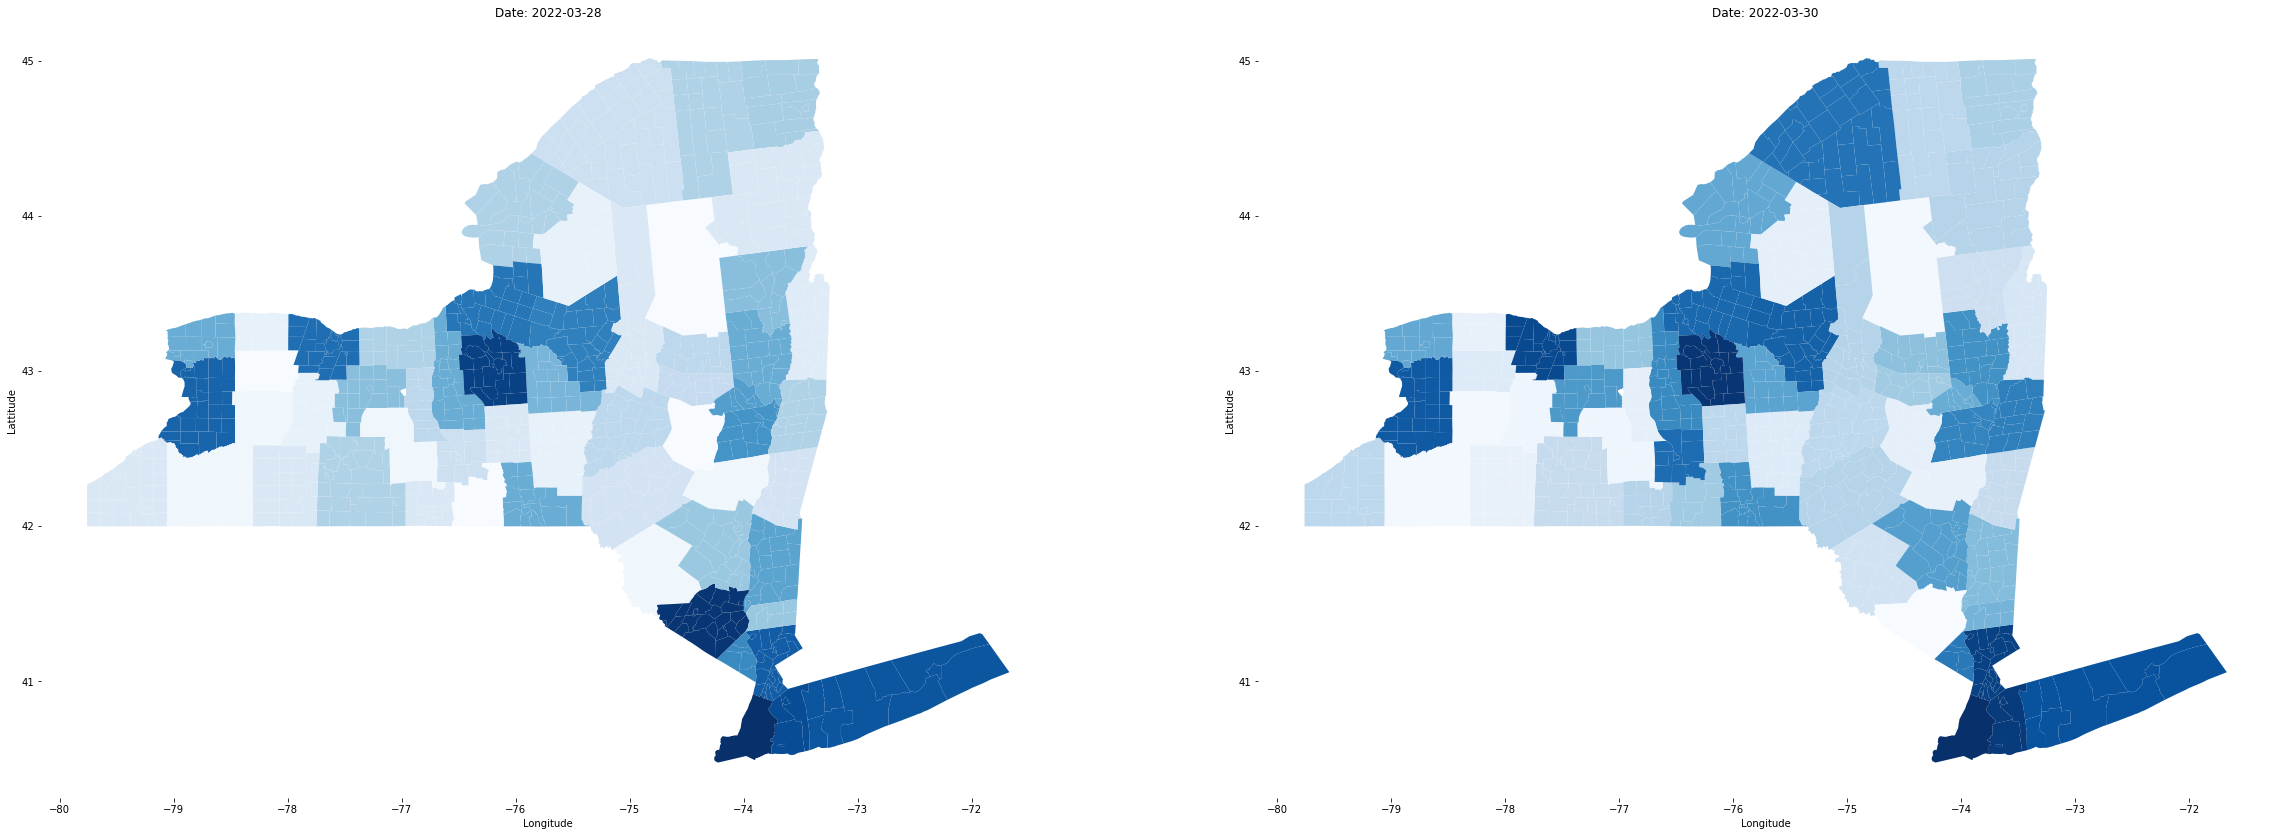

In [65]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-03-28',ax1),('2022-03-30',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'daily_cases', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

In [66]:
#df['daily_cases'].isnull().values.any()

count_nan = df['daily_cases'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0
